# Project 2: Clustering

## Group Members:
- Eli Weiss
- Omar Hussein
- Julian Ruggiero

# Introduction

The world of online retail is an one of the most exciting industries in the world. The market now uses data science methodologies to enhance their productivity and provide more context for their decisions. In this project we will cluster information from a website that contains a wide variety of metrics in order to form groups. Based off these groups we are going to predict whether or not a given online session will generate revenue.
__1)__ Data Profiling. <br>
__2)__ Pre-Clustering Exploratory Data Analysis. <br>
__3)__ Pre-Clustering Data Preparation. <br>
__4)__ Cluster Modeling. <br>
__5)__ Post-Clustering Exploratory Data Analysis. <br>
__6)__ Clustering Output vs. Actual Labels. <br>
__7)__ SVM Modeling. <br>
__8)__ Select Models. <br>
__9)__ Clustering + SVM Output vs. Actual Labels <br>
__10)__ Conclusions. <br>

# Data Profiling

#### The dataset consists of feature vectors belonging to 12,330 sessions.
The dataset was formed so that each session
would belong to a different user in a 1-year period to avoid
any tendency to a specific campaign, special day, user
profile, or period. 


Further information about the data set can be found at [Link](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset)

- The values of the 6 first features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another:

    - __Administrative:__ The number of Administrative pages visited by the visitor per session.  <br>
    - __Administrative_Duration:__ The Amount of Time on Administrative pages per session.  <br>
    - __AVG_Administrative_Duration:__ A calculated field showing the average amount of time on Admin Pages <br>
    - __Informational:__ The number of Informational pages visited by the visitor per session. <br>
    - __Informational_Duration:__ The Amount of Time on Informational pages per session. <br>
    - __AVG_Informational_Duration:__ A calculated field showing the average amount of time on Info Pages <br>
    - __ProductRelated:__ The number of ProductRelated pages visited by the visitor per session. <br>
    - __ProductRelated_Duration:__ The Amount of Time on ProductRelated pages per session. <br>
    - __AVG_ProductRelated_Duration:__ A calculated field showing the average amount of time on Product Pages <br>


- The following 3 features represent metrics measured by "Google Analytics" for each page in the e-commerce site:

    - __Bounce_Rate:__ the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. <br>
        The height of the bounce rate and whether that’s a good or a bad thing really depends on the purpose of the page. If the purpose of the page is purely to inform, then a high bounce rate isn’t a bad thing per se.  If the purpose of a page is to actively engage with your site, then a high bounce rate is a bad thing. Let’s say you have a page that has one goal: get visitors to subscribe to your newsletter. If that page has a high bounce rate, then the owner of the site might need to optimize the page itself. More info [Link](https://yoast.com/understanding-bounce-rate-google-analytics/) <br>
        Having a high bounce rate can mean three things: <br>

    1. The quality of the page is low. There’s nothing inviting to engage with.
    2. Your audience doesn’t match the purpose of the page, as they won’t engage with your page.
    3. Visitors have found the information that they were looking for.
    
        More info and example on both bounce rate and exit rate: [Link](https://support.google.com/analytics/answer/2525491?hl=en&ref_topic=6156780). <br>

    - __ExitRates:__ for all pageviews to the page, the percentage that were the last in the session. It says something about users deciding to end their session on your website on that particular page. <br>
    - __PageValues:__ average value for a web page that a user visited before completing an e-commerce transaction. Page Value is a metric that can be found in the all pages report in the Google Analytics' behavior section. This metric tells you if the page has contributed to a conversion or not. Google’s definition is:

        "Page Value is the average value for a page that a user visited before landing on the goal page or completing an Ecommerce transaction (or both)." You can only see a true value in the Page Value column if you have implemented enhanced eCommerce tracking and/or if you’ve set up goals and assigned goal value to them. If you have none of the former, the Page Value of your pages will be $0.00. [Link](https://yoast.com/what-is-page-value-in-google-analytics/)
        
        
- Rest of the features:
    - __SpecialDay:__ the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentine's day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. <br>
    - __Month:__ The month of the year. <br>
    - __OperatingSystems:__ a categorical attribute with 8 classes. <br>
    - __Browser:__ a categorical attribute with 13 classes. <br>
    - __Region:__ a categorical attribute with 9 classes. <br>
    - __TrafficType:__ a categorical attribute with 20 classes. <br>
    - __VisitorType:__ returning or new visitor. 
    More info in [Link](https://www.hotjar.com/google-analytics/glossary/users/#:~:text=A%20'new%20user'%20is%20a,a%20cookie%20is%20not%20present.). Section 'What are new vs. returning users?'   <br>
    - __Weekend:__ Boolean value if this is a weekend. <br>

# Pre-Clustering Exploratory Data Analysis

In this first section we are going to perform EDA on the unlabeled data to understand the basis of our dataset.

In [1]:
# importing libraries needed
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import probplot
import numpy as np
from pandas.plotting import scatter_matrix
import warnings
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from scipy.cluster import hierarchy


# styling matplotlib graphs
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (8,4)
warnings.filterwarnings('ignore')

C:\Users\omarm\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#loading the data set
df=pd.read_csv("https://raw.githubusercontent.com/enwweiss/DAV-6150/master/Project2_Data.csv")

#sanity check
df.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,8,222.000,0.000000,0.028571,53.474571,0.0,May,1,1,1,2,New_Visitor,True
1,0,0.0,0,0.0,14,1037.500,0.014286,0.047619,0.000000,0.0,Mar,2,2,4,2,Returning_Visitor,False
2,4,37.5,2,82.0,4,96.625,0.000000,0.017500,0.000000,0.0,Nov,2,2,9,2,New_Visitor,False


In [3]:
#checking data types on raw data and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

We can see that there aren't any null values in any of the columns. Now we will decide on which columns should be numeric and which columns should be categorical and create 2 lists for each of them. <br>

After creating this lists, we will perform EDA on numeric attributes first, and then perform EDA on the categorical ones

In [4]:
#create standard var columns
columns = df.columns.to_list()

#create standard var numeric
numeric = ['Administrative', 'Administrative_Duration',
           'Informational', 'Informational_Duration',
           'ProductRelated', 'ProductRelated_Duration',
           'BounceRates', 'ExitRates', 'PageValues','SpecialDay']

#create standard var categorical
categorical = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']

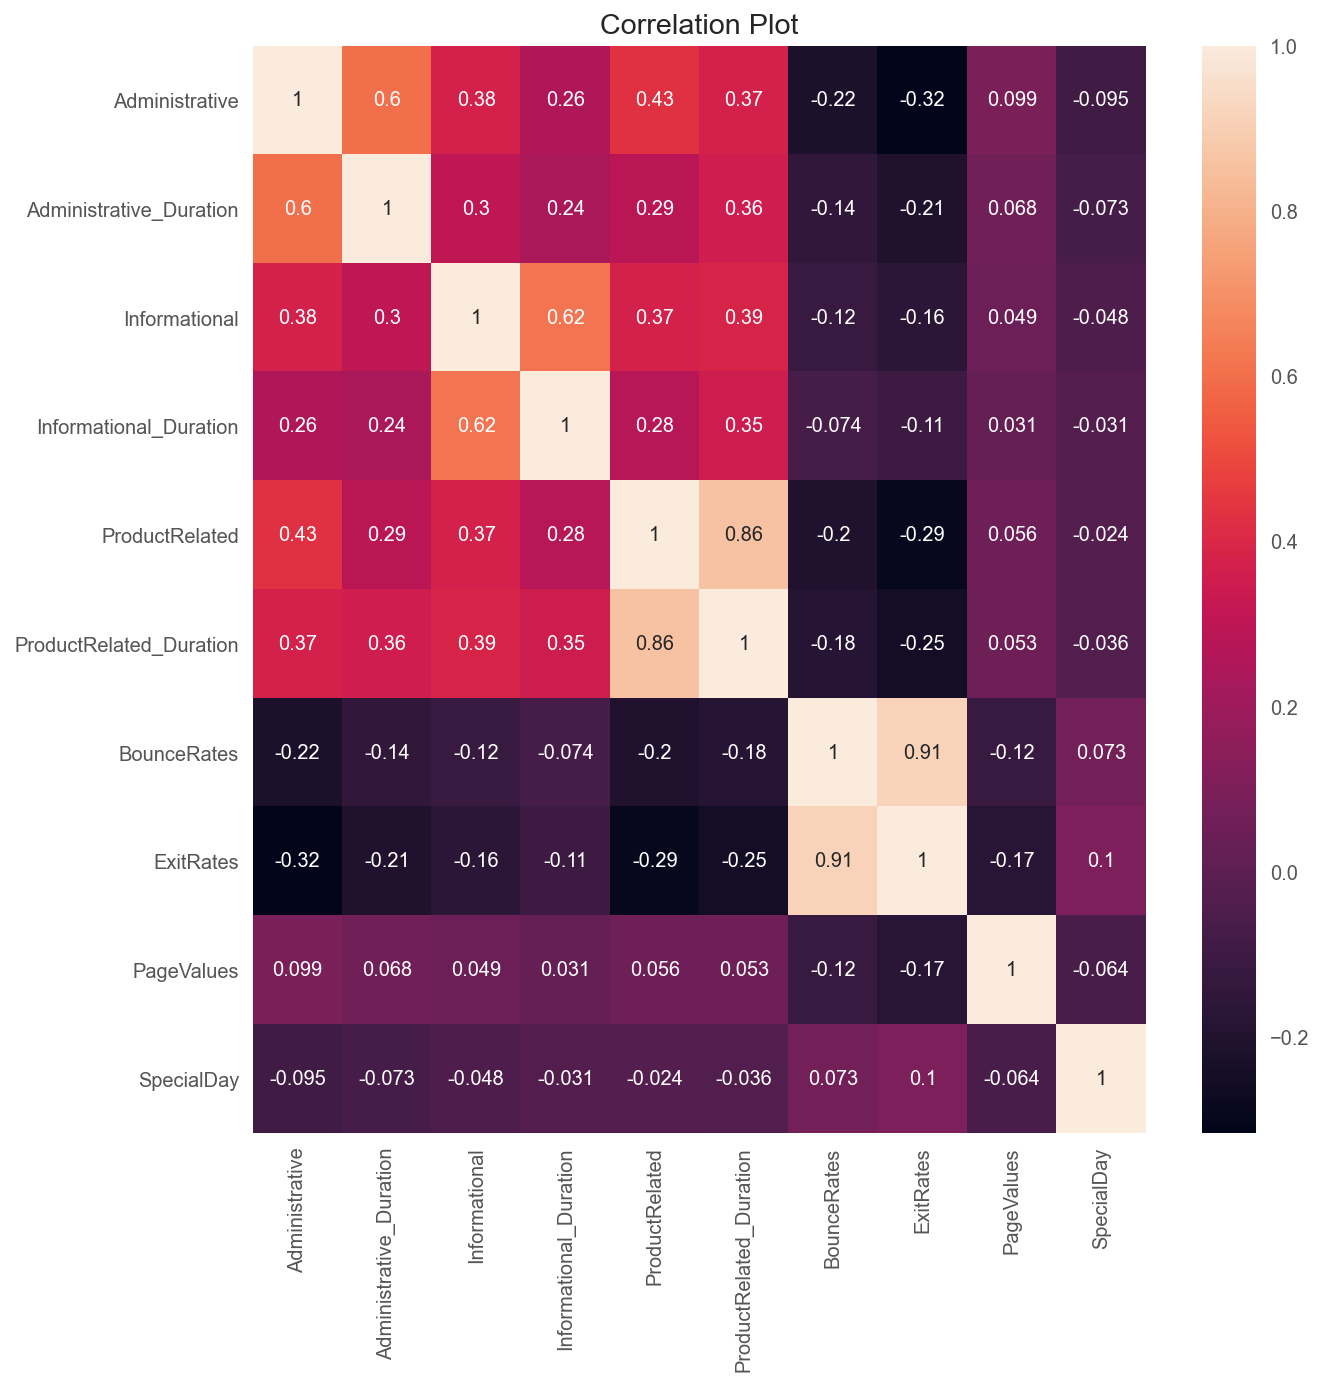

In [5]:
# initial correlation
cor = df[numeric].corr()
plt.figure(figsize=(10,10))
plt.title("Correlation Plot")
sns.heatmap(cor,annot=True)
plt.show()

We can see that ExitRates and Bounce rates are highly correlated at .91 as well as Product related_duration and product related, which means these four features should be further investigated.

Now we look at the distributions of the numeric attributes

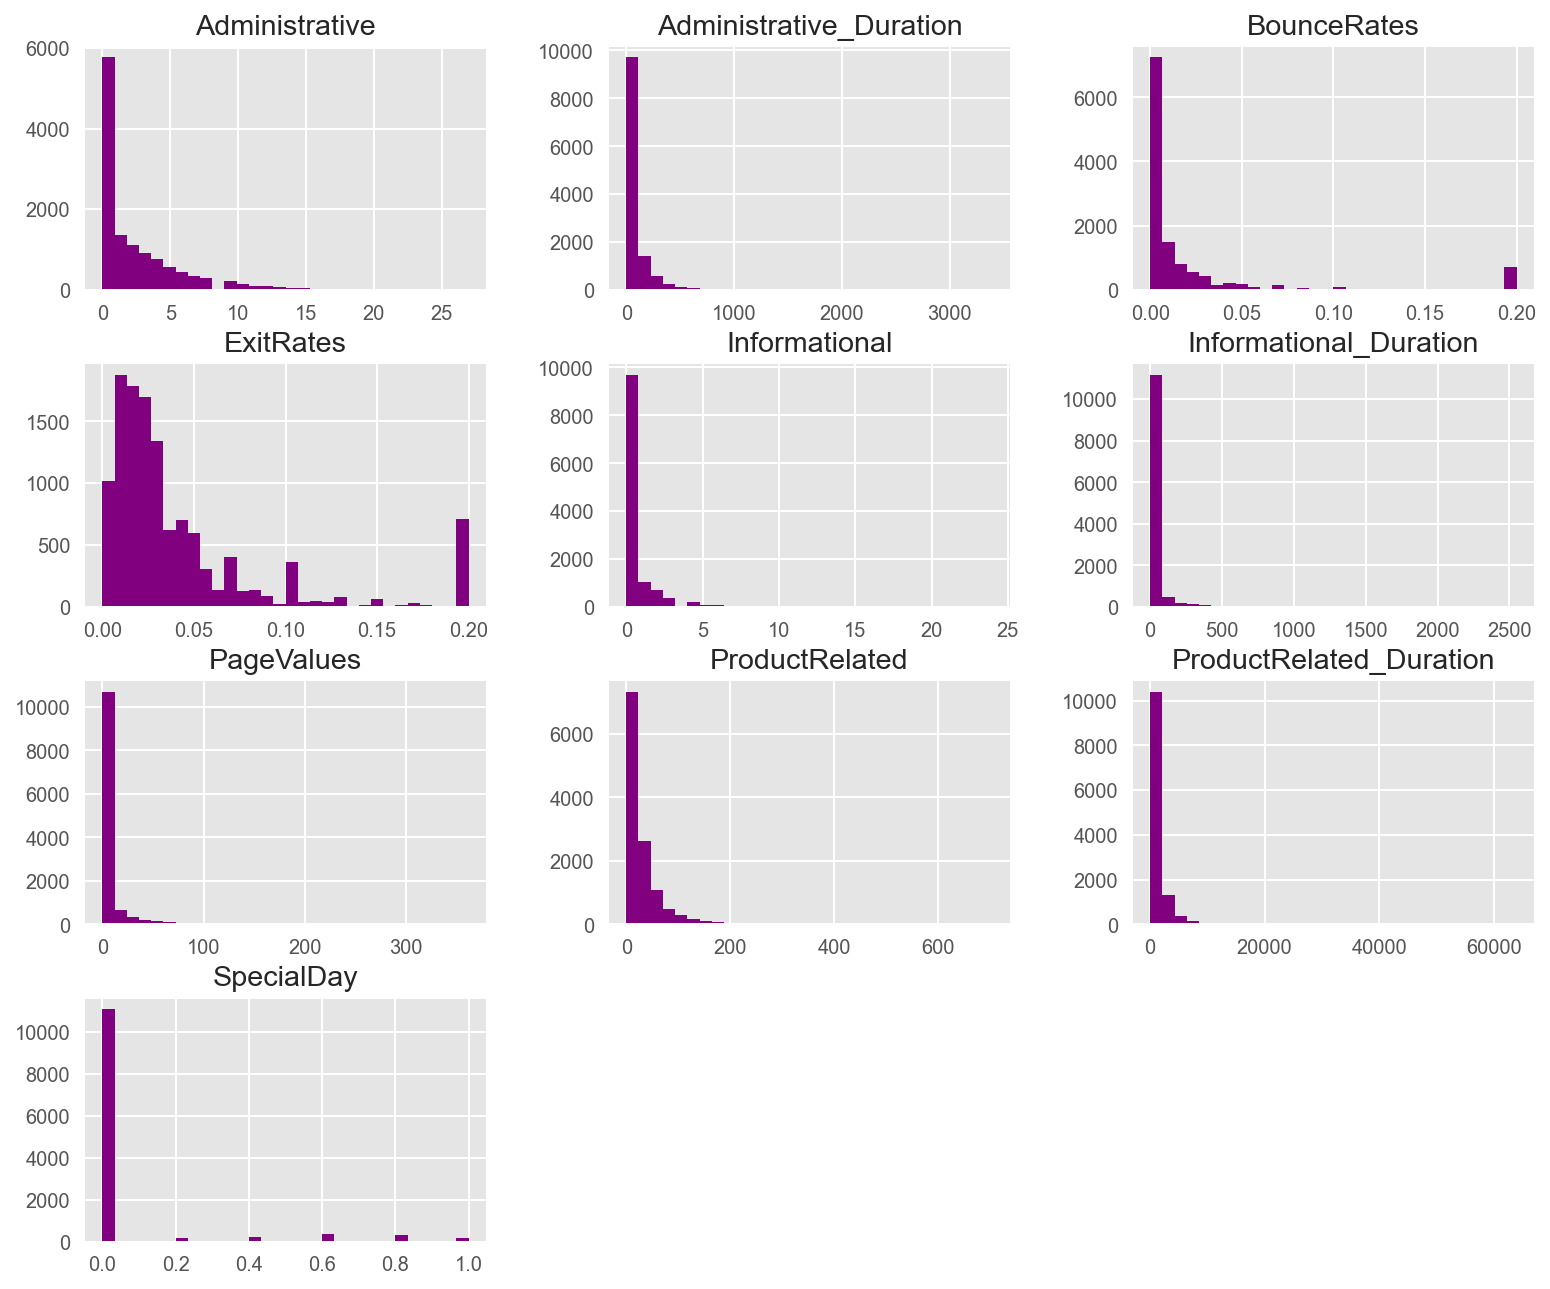

In [6]:
df[numeric].hist(figsize=(13, 11), color='purple', bins = 30);
plt.show();

We can see that all distributions look to be right skewed. Also we can see that the numeric data seems to be in very different scale, as the ones related to duration seem to reach values in the order of thousands, whereas ratios like exit rate and bounce rate are between 0 and 0.2. This suggests that we will need to standardize/normalize these set of attributes before applying clustering. Now we look at in more details with box plot to try to identify outliers.

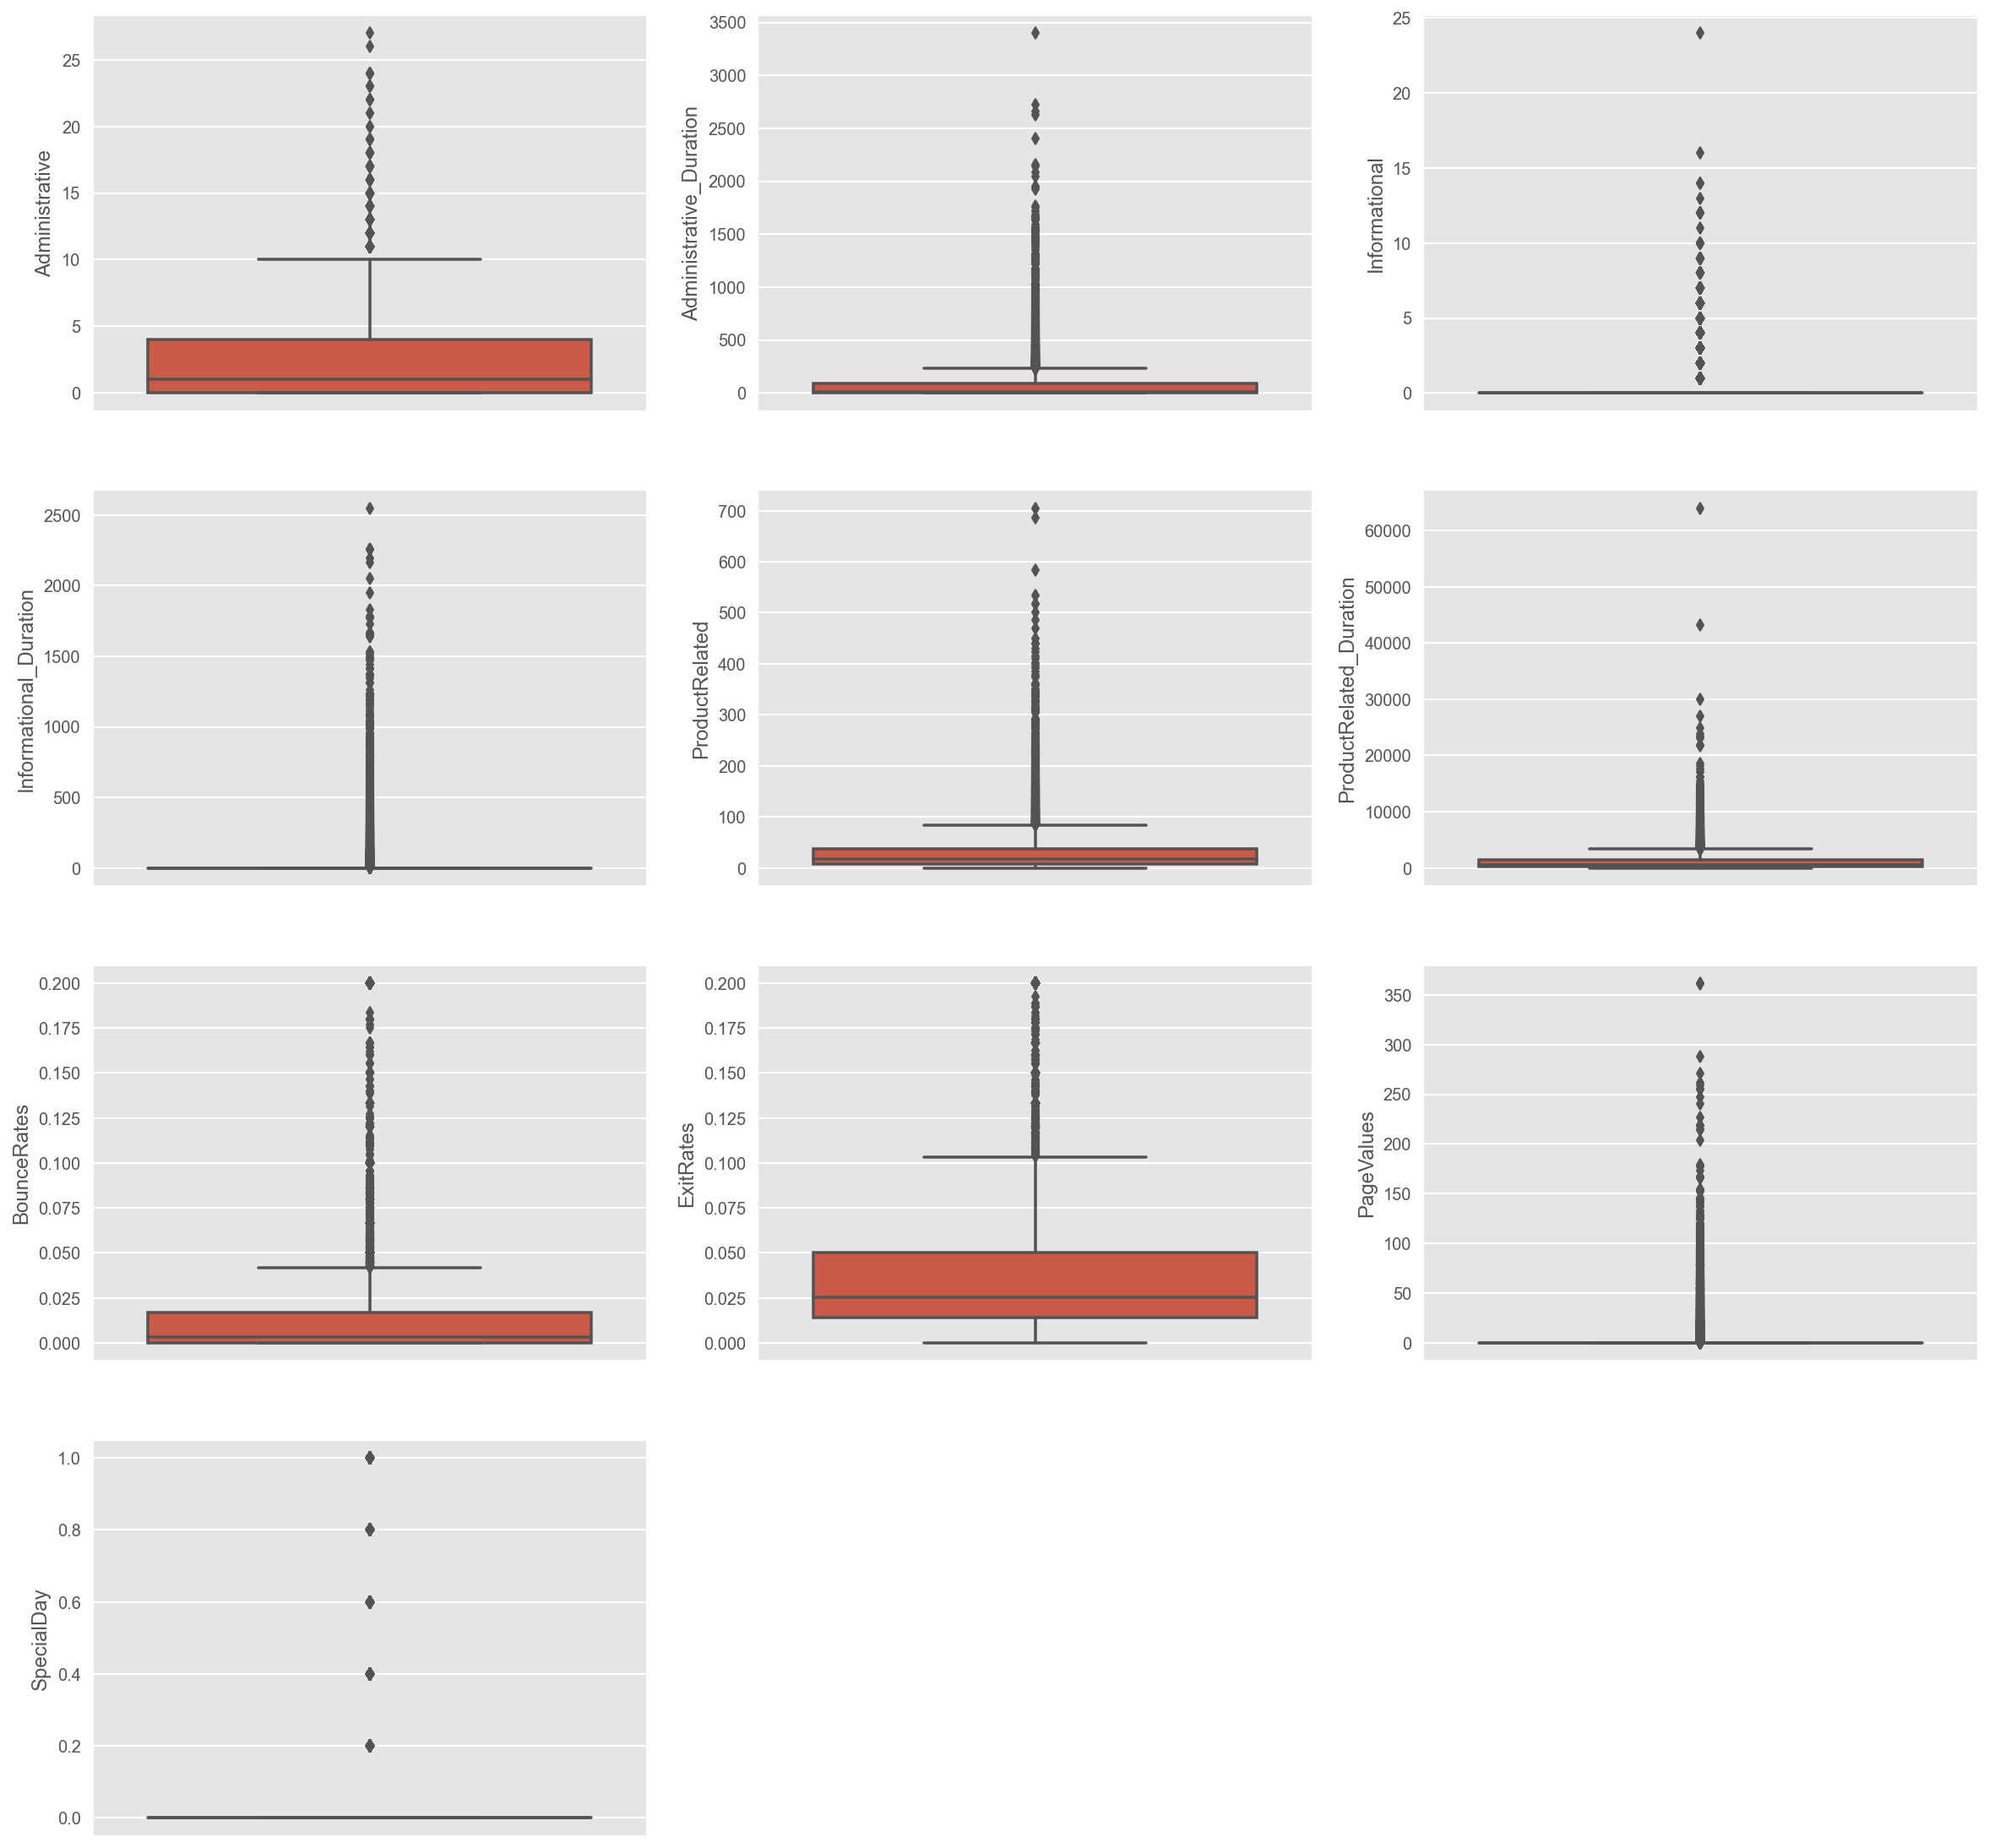

In [7]:
#define a figure to which we will add boxplots of each attribute.
plt.figure(figsize=(20,25))

#use an index to identify the spot of the subplot
j = 1

# Columns
for k in numeric:   #for each numeric column in the dataframe
    plt.subplot(5,3,j)
    sns.boxplot(y = k,data = df)
    j = j + 1 #add 1 to go to the next subplot space

#show results
plt.show();

We can see extremely high values for duration, specially for ProductRelated_Duration with times up to 60000 seconds. However, this can be still considered valid data values, and considering we also have the number of ProductRelated pages we can create new fields with ratios to get the amount of time per page. Because of this we can move forward and treat all of these values as valid. No values need to be removed from Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, and ProductRelated_Duration.

The rest of the numeric features all have valid values. Both BounceRates and ExitRates do not exceed 20% which is a valid value. PageValue which is a measure of dollar value of a page does not have any values that can be eliminated. SpecialDay only has 6 unique values all within the definition for the attribute that was provided.

Now we perform EDA on categorical features.

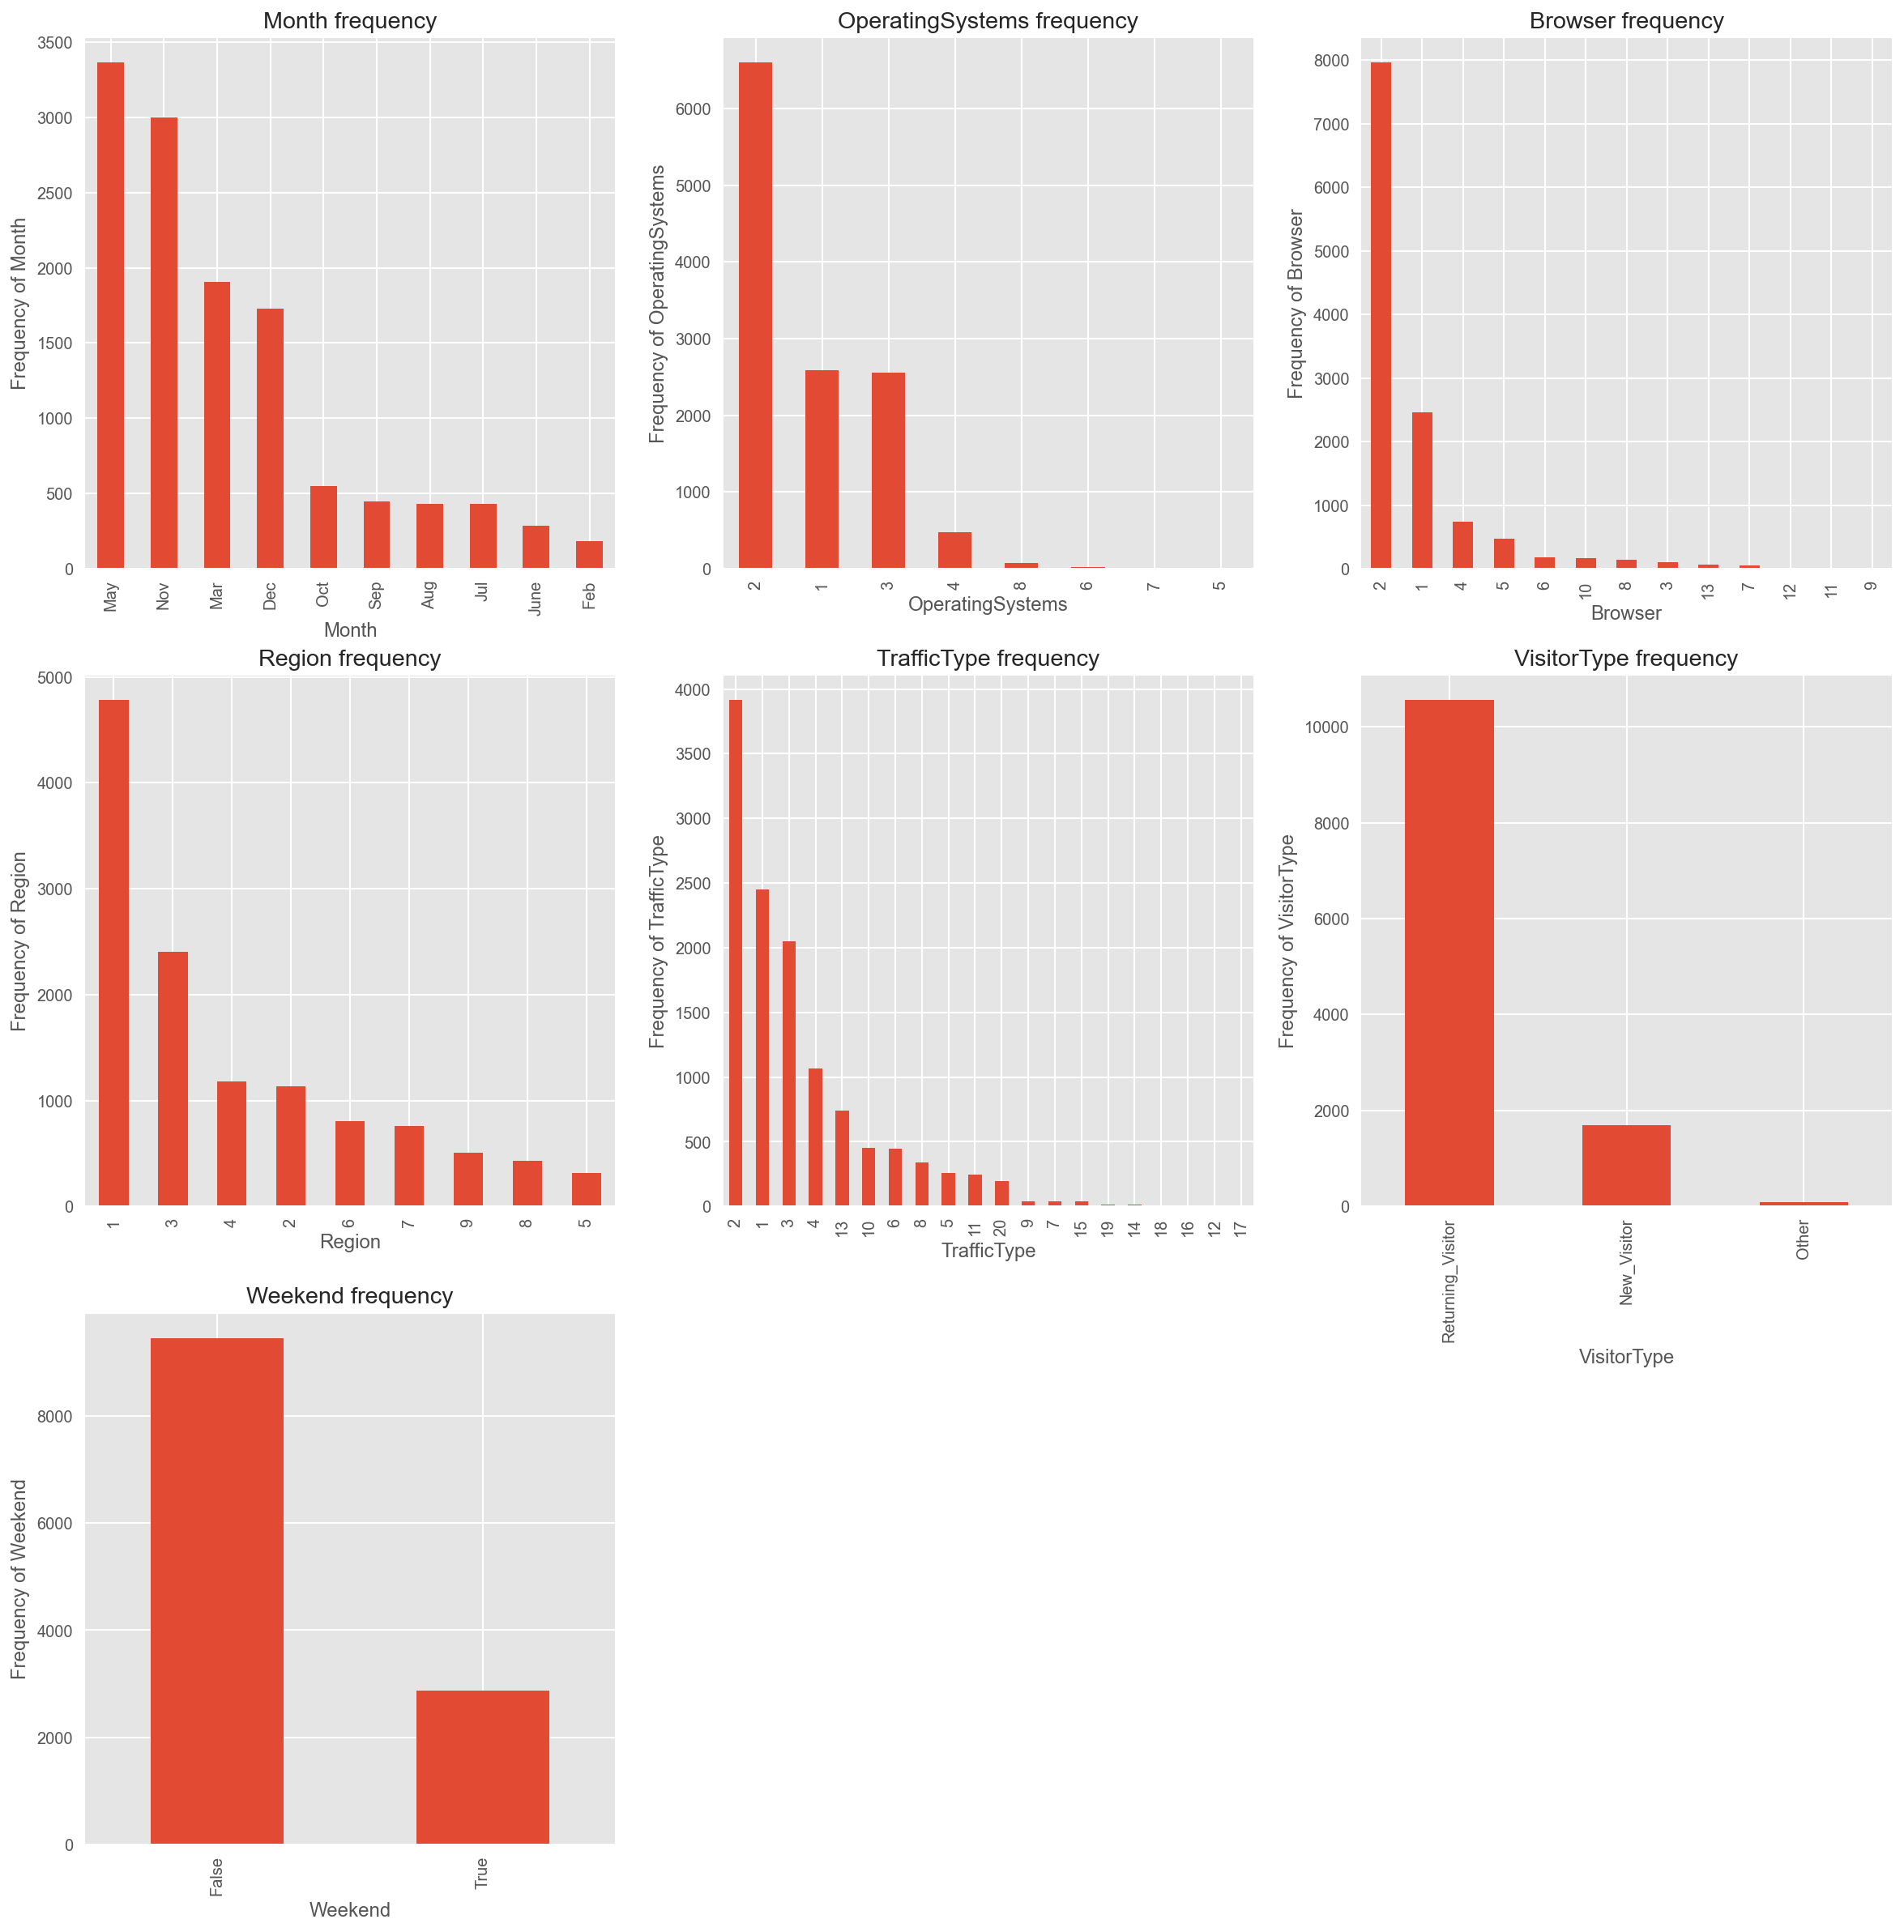

In [8]:
#define a figure to which we will add boxplots of each attribute.
plt.figure(figsize=(20,35))

#use an index to identify the spot of the subplot
j = 1

# Columns
for k in categorical:   #for each numeric column in the dataframe
    plt.subplot(5,3,j)
    df[k].value_counts().plot(kind='bar');
    plt.title(str(k) + ' frequency')
    plt.xlabel(k)
    plt.ylabel('Frequency of ' + k)
    j = j + 1 #add 1 to go to the next subplot space

#show results
plt.show();

For this categorical attributes we can see that:
 - Month has only 9 values, and it shows that the majority of sessions took place during May and November, followed by March and December. As this is ordinal, we will need to transform months names to numbers, starting with February in this case, and ending with December.
 - Operating systems: there is one main OS that represents around half of all records. We will can create dummy columns for each one. We can also see sparse classes that could probably be grouped together in a column called 'other_os' with the ones that are below a specific threshold value.
 - Browser: similar to OS, there is one main browser that represents more than half of all records. We will need to create dummy columns for each one. We can also see sparse classes that could probably be grouped together in a column called 'other_browser'.
 - Region: there is 9 different regions, with one covering almost half of the records. We will need to create dummy columns.
 - Traffic type: There is a big number of different types for this attribute so we would want to group sparse classes together and create dummy columns.
 - Visitor type: despite the data dictionary only mentions that there could be 'new' or 'returning' visitor we also see 'other'. If we keep just 'returning' and 'new' we can have a new column called 'new_visitor' with a 1 in case is actually a new visitor, otherwise a 0. We decide to delete the rows that have the 'other' category.
 - Weekend: shows that majority of sessions took place during the week.
 
Now that we have identified the changes that we will apply to our data we can continue with the data preparation for clustering.

# Pre-Clustering Data Preparation

In this section we are going to preprocess the data and then in the next section we will feed this preprocessed data into a clustering algorithm.

## Feature Engineering

Let's create the average amount of time per page view for the three metrics we have:

In [9]:
df['AVG_Admin_Time'] = df['Administrative_Duration'] / df['Administrative']
df['AVG_Info_Time'] = df['Informational_Duration'] / df['Informational']
df['AVG_Product_Time'] = df['ProductRelated_Duration'] / df['ProductRelated']

Let's check to see if there are nulls from the new attributes

In [10]:
print(df['AVG_Admin_Time'].isnull().sum())
print(df['AVG_Info_Time'].isnull().sum())
print(df['AVG_Product_Time'].isnull().sum())

5768
9699
38


There are lot of nulls from the new attributes let's see if they are caused by 0/0

In [11]:
print(df[df.Administrative == 0].sum(axis=1).count())
print(df[df.Informational == 0].sum(axis=1).count())
print(df[df.ProductRelated == 0].sum(axis=1).count())

5768
9699
38


All of the nulls in the 3 new ratio fields are caused by a 0/0 error. Let's replace all nulls with 0's since they are all 0/0 errors and it would be valid for the scope of this new field.

In [12]:
df.AVG_Admin_Time.fillna(0, inplace = True)
df.AVG_Info_Time.fillna(0, inplace = True)
df.AVG_Product_Time.fillna(0, inplace = True)

df[['AVG_Admin_Time','AVG_Info_Time','AVG_Product_Time']].isnull().sum()

AVG_Admin_Time      0
AVG_Info_Time       0
AVG_Product_Time    0
dtype: int64

We can see there is no null values in any column.

In [13]:
df = df.drop(columns=['Administrative_Duration', 'Administrative',
                 'Informational_Duration', 'Informational',
                 'ProductRelated_Duration', 'ProductRelated'])

Now we will replace all categorical attributes for the appropiate numeric values. 

In [14]:
#convert Text to Numeric Values for all Categorical fields
df.Weekend.replace([False, True], [0, 1], inplace = True)
df.Month.replace(['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec'],
                 [1,2,3,4,5,6,7,8,9,10,11,12], inplace = True)

### Combining Sparse Classes

The code below will combine sparse classes for three columns: OperatingSystems, TrafficType and Browser. 
For OperatingSystems we create a record count to identify those types that have less than 500 instances, and we group those records together in one single category. 
For OperatingSystems it will be 'other_os', for TrafficType 'other_traffic_type' and for Browser 'other_browser'.

In [15]:
os_counts = df.OperatingSystems.value_counts().to_frame().reset_index()
os_counts.columns = ['value','counts']
os_counts

,value,counts
0,2,6601
1,1,2585
2,3,2555
3,4,478
4,8,79
5,6,19
6,7,7
7,5,6


In [16]:
def lambda_os(row, threshold):
    count = os_counts[os_counts.value == row['OperatingSystems']]['counts'].values[0]
    if count < threshold:
        return 1
    return 0

df['other_os'] = df.apply(lambda row: lambda_os(row, 500), axis=1)

In [17]:
traffic_counts = df.TrafficType.value_counts().to_frame().reset_index()
traffic_counts.columns = ['value','counts']
traffic_counts

,value,counts
0,2,3913
1,1,2451
2,3,2052
3,4,1069
4,13,738
5,10,450
6,6,444
7,8,343
8,5,260
9,11,247


In [18]:
def lambda_traffic(row, threshold):
    count = traffic_counts[traffic_counts.value == row['TrafficType']]['counts'].values[0]
    if count < threshold:
        return 1
    return 0

df['other_traffic_type'] = df.apply(lambda row: lambda_traffic(row, 500), axis=1)

In [19]:
browser_counts = df.Browser.value_counts().to_frame().reset_index()
browser_counts.columns = ['value','counts']
browser_counts

,value,counts
0,2,7961
1,1,2462
2,4,736
3,5,467
4,6,174
5,10,163
6,8,135
7,3,105
8,13,61
9,7,49


In [20]:
def lambda_browser(row, threshold):
    count = browser_counts[browser_counts.value == row['Browser']]['counts'].values[0]
    if count < threshold:
        return 1
    return 0

df['other_browser'] = df.apply(lambda row: lambda_browser(row, 200), axis=1)

In this section we are going to transform all the categorical data into numerical data that can be interpreted by the machine learning model as without this step the model would either not provide accurate results or in other cases not work at all. We also delete the columns that were grouped together as sparse classes.

In [21]:
df = pd.get_dummies(df, columns=['OperatingSystems','Browser','Region','TrafficType', 'VisitorType'])

In [22]:
pd.options.display.max_columns = 199 
df.head()

,BounceRates,ExitRates,PageValues,SpecialDay,Month,Weekend,AVG_Admin_Time,AVG_Info_Time,AVG_Product_Time,other_os,other_traffic_type,other_browser,OperatingSystems_1,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Browser_1,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.000000,0.028571,53.474571,0.0,5,1,0.000,0.0,27.750000,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.014286,0.047619,0.000000,0.0,3,0,0.000,0.0,74.107143,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.000000,0.017500,0.000000,0.0,11,0,9.375,41.0,24.156250,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0.000000,0.012037,0.000000,0.0,11,0,28.925,0.0,40.961458,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.000000,0.003846,0.000000,0.0,5,0,60.000,15.0,25.775641,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [23]:
df = df.drop(columns=['OperatingSystems_5', 'OperatingSystems_5', 'OperatingSystems_6', 'OperatingSystems_7', 'OperatingSystems_8',
                 'Browser_6','Browser_10','Browser_8','Browser_3','Browser_13','Browser_7','Browser_12','Browser_11','Browser_9',
                 'TrafficType_10', 'TrafficType_6', 'TrafficType_8', 'TrafficType_5', 'TrafficType_11',
                 'TrafficType_20', 'TrafficType_9', 'TrafficType_7', 'TrafficType_15', 'TrafficType_19',
                 'TrafficType_14', 'TrafficType_18', 'TrafficType_16', 'TrafficType_12', 'TrafficType_17'])

In [24]:
df.shape

(12330, 37)

## Normalizing Data

Feature Scaling we chose to use here is Normalization. We applied it here in order to handle highly varying magnitudes/values. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values. Normalization (Min-Max) transforms features by scaling each feature to a specific range, in our case we choose to use the default range of 0 and 1 as it is widely used by machine learning/Data science practitioners around the world so much that it has become the default way of normalizing data in the sklearn package [3] .
    
The reason we chose normalizing data over standardizing is because normalization is good to use when we know that the distribution of our data does not follow a Gaussian distribution. Furthermore, unlike normalization, standardization does not have a bounding range. So, even if we have outliers in our data, they will not be affected by standardization [4][5].

In [25]:
norm_cols = ['PageValues',
             'AVG_Admin_Time',
             'AVG_Info_Time',
             'AVG_Product_Time']

In [26]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler() #StandardScaler()
X = mm.fit_transform(df[norm_cols].values) # Normalizing the data

# Normalized data
normalized = pd.DataFrame(X, index=df.index, columns=norm_cols) # Restructuring it back into df
df_less_norm = df.drop(norm_cols, axis=1)

# we create a normalized data set to test if it improves clustering per James' instuctions in class
df_norm = pd.concat([df_less_norm, normalized], axis=1).reindex(df_less_norm.index)

#Check that the normalized dataframe is the same size as the regular dataframe
df_norm.shape

(12330, 37)

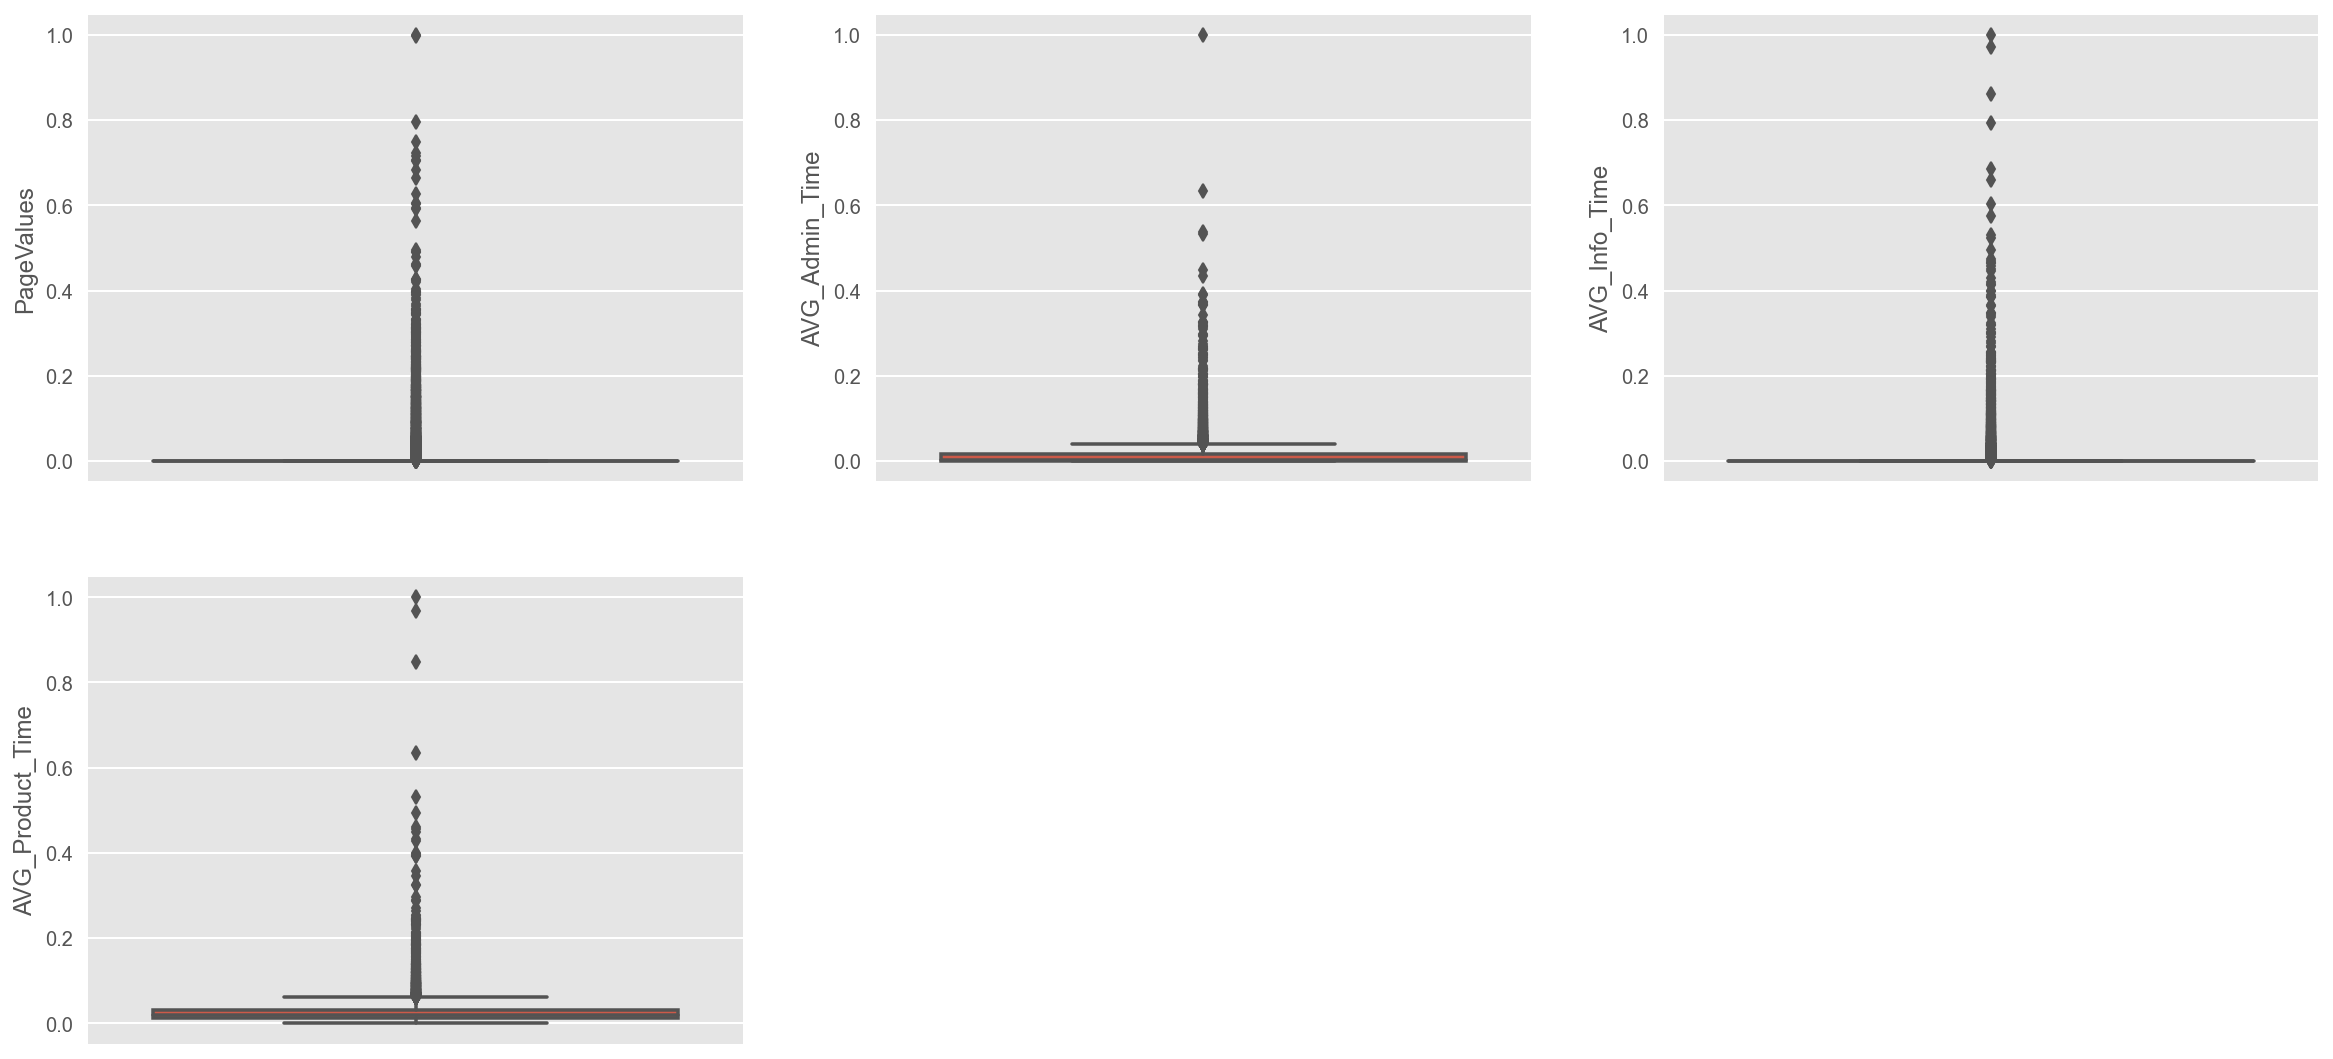

In [27]:
#define a figure to which we will add boxplots of each attribute.
plt.figure(figsize=(20,25))

#use an index to identify the spot of the subplot
j = 1

# Columns
for k in norm_cols:   #for each numeric column in the dataframe
    plt.subplot(5,3,j)
    sns.boxplot(y = k,data = df_norm)
    j = j + 1 #add 1 to go to the next subplot space

#show results
plt.show();

The data has been normalized successfully above as all the numeric variables are now on the same scale, between a fixed range of `(0 and 1)` and are ready to be fed into a clustering algorithm.

# Cluster Modeling

In the following section we will tackle the issue of choosing the optimal number of clusters in regards to this dataset. First we create a Hierarchical clustering algorithm using scipy and generate a dendogram to help us identify the "best" number of clusters. Then we will implement a K-means algorithm using a range of values of K to create an elbow plot and a silhouette plot.

### Hierarchical clustering algorithm

In the Hierarchical or Agglomerative clustering we start with each sample in its own cluster, then it combines the nearest clusters and is repeated until done while keeping track of the nearest sizes. To avoid the noise of all the samples in it, we use the truncate_mode parameter to combine the leaves into a single node.

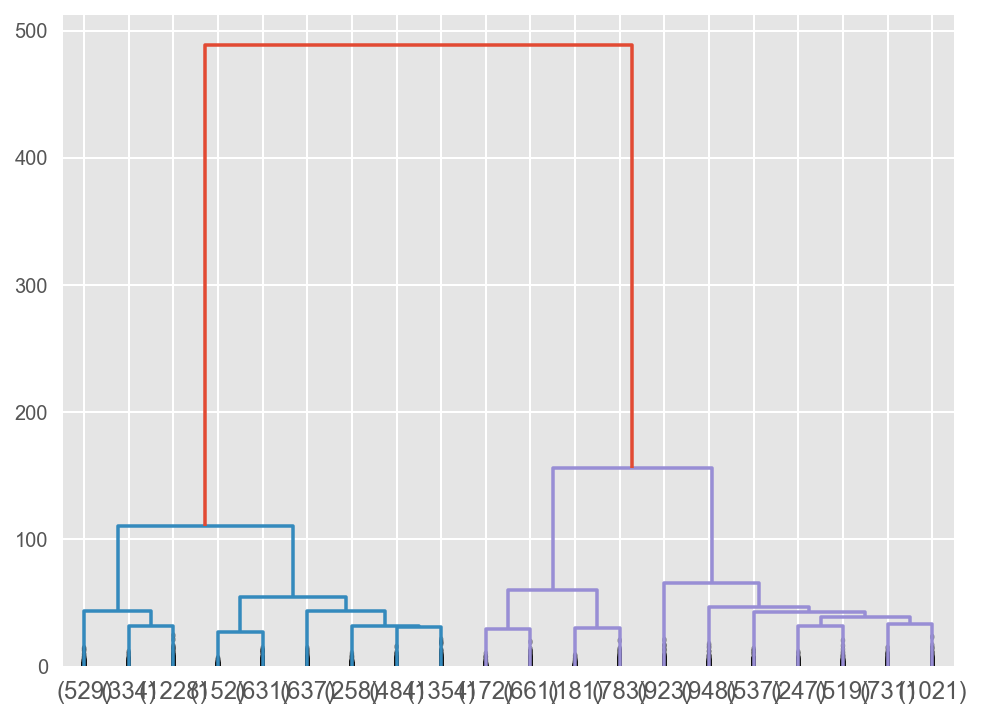

In [28]:
# Figure
fig, ax = plt.subplots(figsize=(8, 6))
dend = hierarchy.dendrogram(
    hierarchy.linkage(df_norm, method="ward"),
    truncate_mode="lastp",
    p=20,
    show_contracted=True,
)

The heights represent how similar clusters are when they are joined. In order to find how many clusters are in the data, we will cut a horizontal line through where it would cross the tallest lines. In this case, it looks like when we perform that cut, it would be three clusters. Seem to have the highest level of `dissimilarity` and therefore in this particular case would choose the number of clusters as 2 clusters.

### K-means clustering algorithm

Understanding Inertia as the sum of squared distances between each data point in a cluster and the cluster's centroid, the code below implements a K-means clustering algorithm using a range values of K (from 2 to 12) and will fit the data and get the resulting inertia, which is stored in the list 'inertias'. Then a plot is created to show for each K the corresponding inertia value.

Text(0, 0.5, 'Inertia')

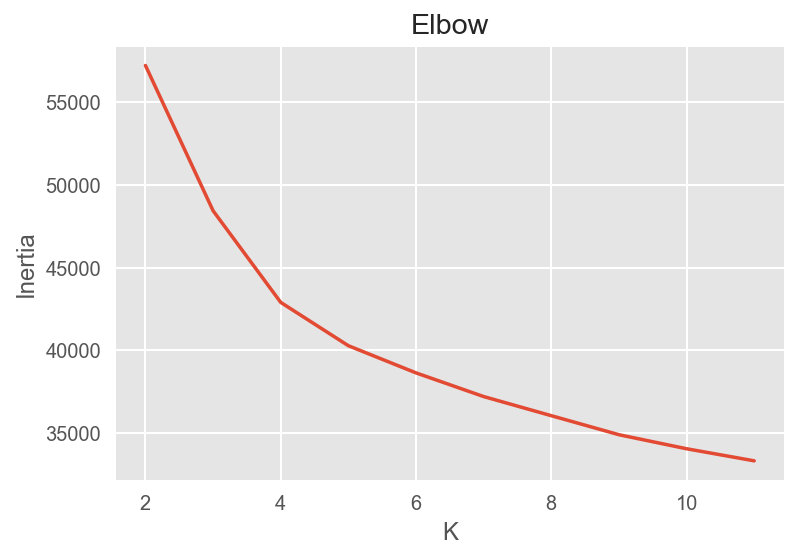

In [29]:
inertias = []
sizes = range(2, 12)
for k in sizes:
    k2 = KMeans(random_state=42, n_clusters=k)
    k2.fit(df_norm)
    inertias.append(k2.inertia_)
fig, ax = plt.subplots(figsize=(6, 4))
pd.Series(inertias, index=sizes).plot(ax=ax)
plt.title("Elbow")
ax.set_xlabel("K")
ax.set_ylabel("Inertia")

Here we see that the curve bends at K= 4 (which is potentially a good choice for the number of clusters). In this case, the curve is smooth, but after K = 8 there is not significant improvement. To have a better sense of the best value for K we will create the Silhouette Coefficient, which is a value between -1 and 1( where and the higher the score the better). <br>
Below we visualize the Silhouette diagram, which shows every instance's silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient. We plot from K= 2 to K = 5.

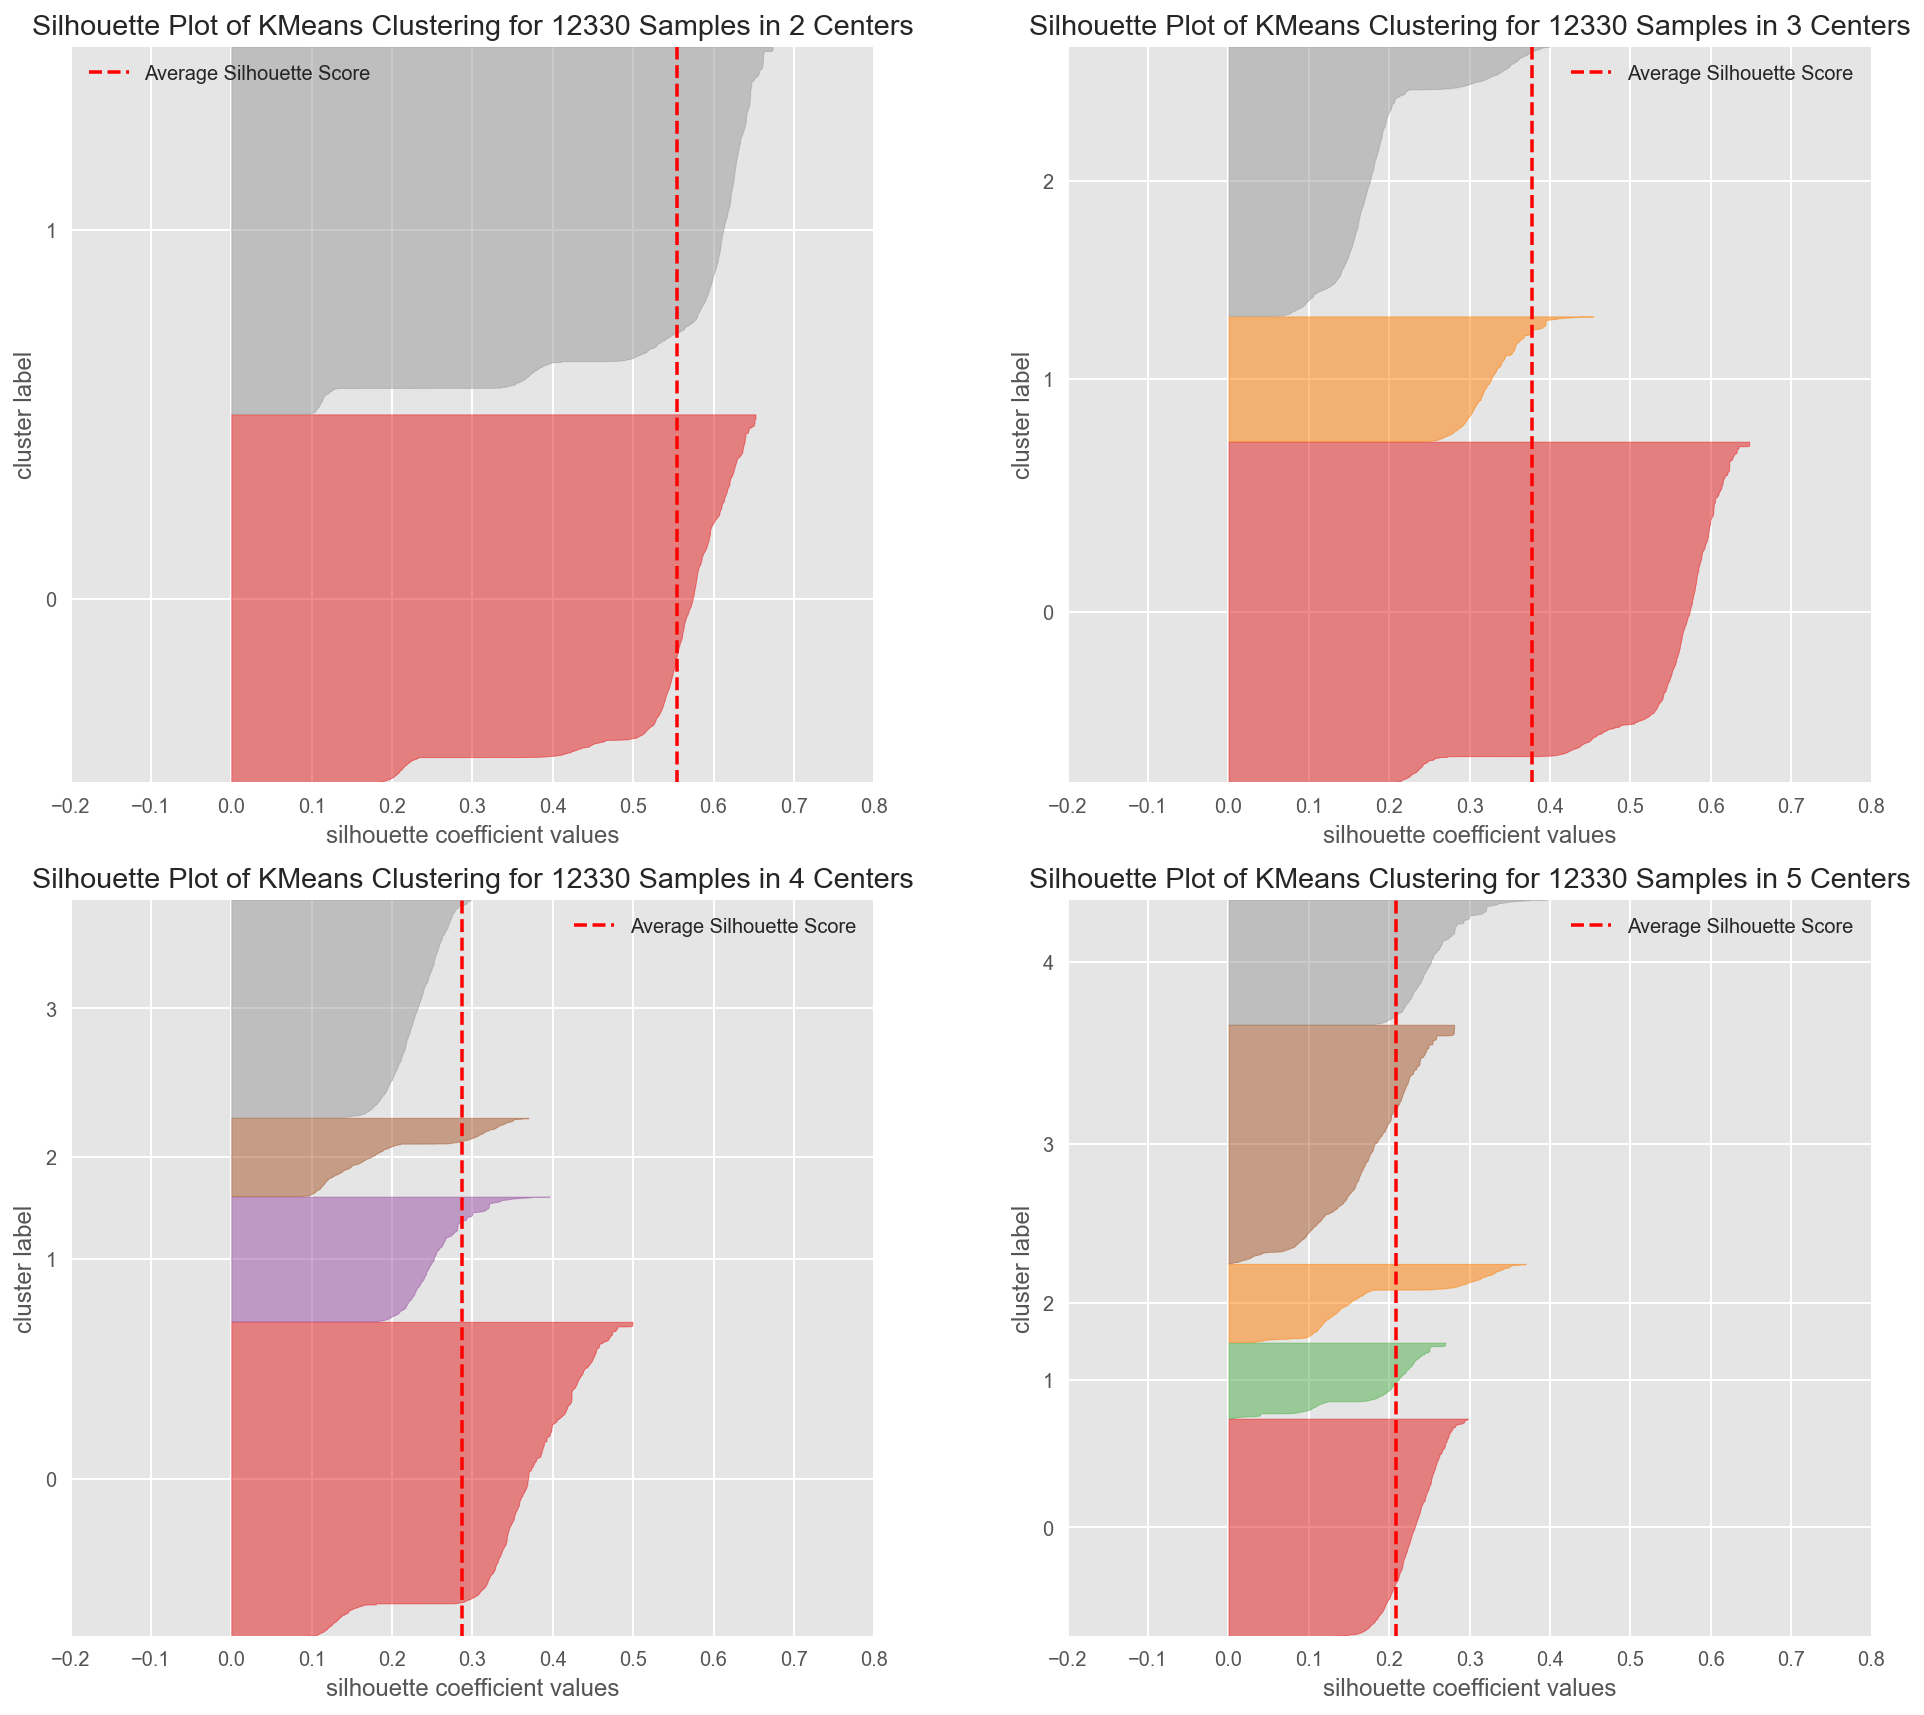

In [30]:
from yellowbrick.cluster.silhouette import (
    SilhouetteVisualizer,
)
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.reshape(4)
for i, k in enumerate(range(2, 6)):
    ax = axes[i]
    sil = SilhouetteVisualizer(
        KMeans(n_clusters = k, random_state = 42 ),
        ax=ax,
    )
    sil.fit(df_norm)
    sil.finalize()
    ax.set_xlim(-0.2, 0.8)
plt.tight_layout()

The vertical dotted red line in this plot above is the average silhouette score. One way to interpret it is to make
sure that each cluster boundary rises above the average, and the cluster scores look decent. What we can infer from this graph is that all clusters centers rise above the average, this is more obvious for 2 clusters (top left) and 5 clusters (bottom right) as the vertical line seems to pass through in a smooth fashion. 

Considering that for 2 clusters it shows a higher silhouette coefficient value (around 0.57 vs 0.22) for 5 clusters, which is even greater than 3 clusters (which has around 0.4). We see that 2 clusters is the best number of clusters. It is also worth noting that 3 clusters won't be an ideal choice since its instances are too close to other clusters.

Below we look closer at the silhouette score for each K in a line graph.

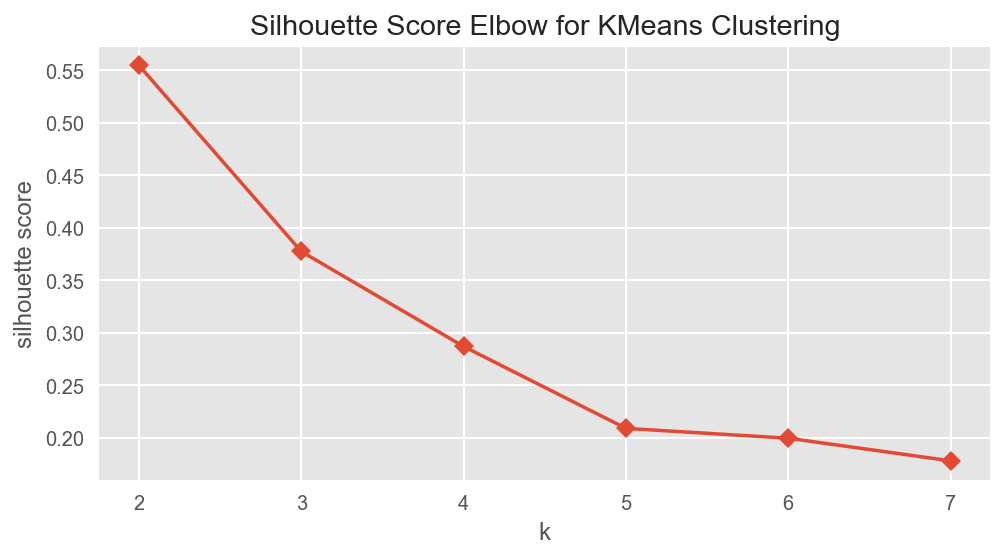

In [31]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,8),metric='silhouette',locate_elbow= True,timings=False)
visualizer.fit(df_norm)
visualizer.poof()
plt.show();

So we can see that the silhouette score is in line with the number of clusters we selected from the output of the hierarchical dendogram. Even though 2 is still relatively high, the instances are too close to other clusters. Hence, we should select 2 as the number of clusters.

### K-means clustering with 2 groups

Now we apply a K-means clustering algorithm to the data set using a value of K=2.

In [37]:
kmeans2 = KMeans(n_clusters = 2 , random_state = 42)
k_fit2 = kmeans2.fit(df_norm)
predictions2 = k_fit2.labels_
predictions2

array([0, 0, 1, ..., 0, 0, 1])

In [38]:
df_norm['Revenue'] = predictions2 # this is for the normalized dataset to be passed on to the model
df_norm.head()

,BounceRates,ExitRates,SpecialDay,Month,Weekend,other_os,other_traffic_type,other_browser,OperatingSystems_1,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,Browser_1,Browser_2,Browser_4,Browser_5,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_13,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,PageValues,AVG_Admin_Time,AVG_Info_Time,AVG_Product_Time,Revenue
0,0.000000,0.028571,0.0,5,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0.147816,0.000000,0.000000,0.019667,0
1,0.014286,0.047619,0.0,3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0.000000,0.000000,0.000000,0.052521,0
2,0.000000,0.017500,0.0,11,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0.000000,0.005984,0.023060,0.017120,1
3,0.000000,0.012037,0.0,11,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.000000,0.018464,0.000000,0.029030,1
4,0.000000,0.003846,0.0,5,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.000000,0.038300,0.008436,0.018268,0


# Post-Clustering Exploratory Data Analysis


Here we will take a look at the number of instances that each cluster has and look at some descriptive statistics to understand any differences in the groups.

In [39]:
df_norm.Revenue.value_counts()

0    6175
1    6155
Name: Revenue, dtype: int64

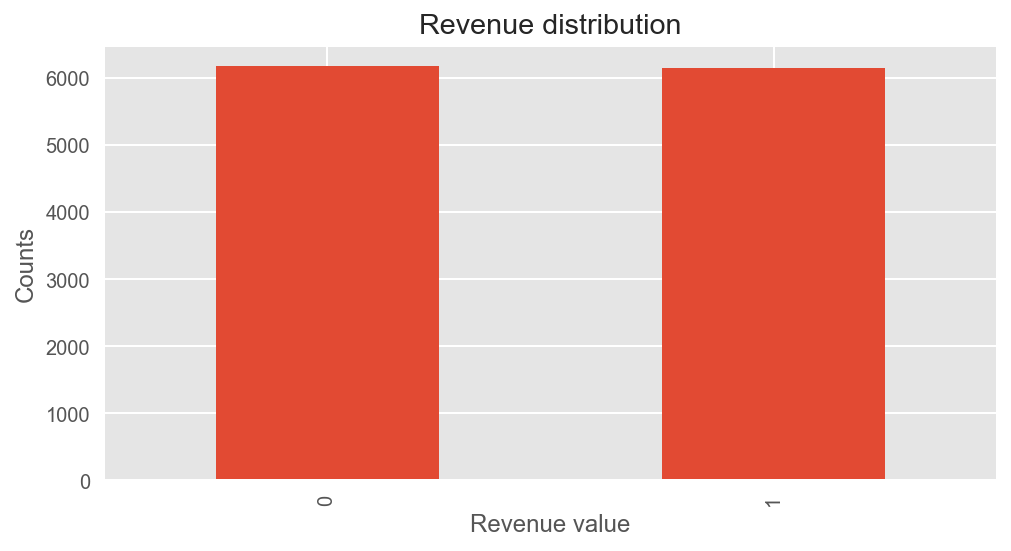

In [40]:
plt.title("Revenue distribution")
plt.xlabel("Revenue value")
plt.ylabel("Counts")
df_norm.Revenue.value_counts().plot(kind='bar');

We can clearly see that the classes (`Revenue` and `No Revenue`) are quite balanced.

In [41]:
df_norm.groupby('Revenue').mean()

,BounceRates,ExitRates,SpecialDay,Month,Weekend,other_os,other_traffic_type,other_browser,OperatingSystems_1,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,Browser_1,Browser_2,Browser_4,Browser_5,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_13,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,PageValues,AVG_Admin_Time,AVG_Info_Time,AVG_Product_Time
Revenue,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.026111,0.048483,0.122656,4.479514,0.222672,0.040648,0.145425,0.054575,0.196113,0.555304,0.207935,0.037733,0.191741,0.641457,0.069798,0.042429,0.378623,0.103482,0.194170,0.095709,0.027530,0.073522,0.061862,0.036923,0.028178,0.208583,0.232874,0.209231,0.137490,0.066397,0.102996,0.000162,0.896842,0.012864,0.011576,0.007198,0.026273
1,0.018259,0.037645,0.000000,10.834768,0.242567,0.054915,0.196426,0.059626,0.223233,0.515353,0.206499,0.039805,0.207636,0.649878,0.049553,0.033306,0.396751,0.080747,0.195613,0.096019,0.024045,0.057027,0.061576,0.033469,0.054752,0.188952,0.402112,0.123477,0.035743,0.053290,0.171893,0.013647,0.814460,0.019706,0.014212,0.009463,0.027072


In general, we can see that the mean of:

 - BounceRates is higher on the cluster that did not have revenue, which expected based on our domain knowledge.
 - ExitRates is higher on the cluster that did not have revenue, which expected based on our domain knowledge.

In [43]:
explanatory = df_norm.loc[:, df_norm.columns != 'Revenue'].columns.to_list()

# Clustering Output vs. Actual Labels

In this section we will be comparing the content of the `V_Revenue` vs the content of the `Revenue` column which was generated by our clustering algorithm and we will look into whether or not they appear to be indicative for when visitor makes a purchase.

In [50]:
#loading the data labels
df_label = pd.read_csv("https://raw.githubusercontent.com/enwweiss/DAV-6150/master/Project2_Data_Labels.csv")

#sanity check
df_label.head()

,Revenue
0,True
1,False
2,False
3,False
4,False


In [51]:
df_norm['V_Revenue'] = df_label.Revenue
df_norm.V_Revenue.replace([False, True], [0, 1], inplace = True)
df_norm.groupby('V_Revenue').mean()

,BounceRates,ExitRates,SpecialDay,Month,Weekend,other_os,other_traffic_type,other_browser,OperatingSystems_1,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,Browser_1,Browser_2,Browser_4,Browser_5,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_13,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,PageValues,AVG_Admin_Time,AVG_Info_Time,AVG_Product_Time,Revenue
V_Revenue,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.025317,0.047378,0.068432,7.467089,0.227308,0.046344,0.162733,0.057571,0.211668,0.522548,0.219440,0.037709,0.201209,0.646517,0.058146,0.036557,0.384667,0.090961,0.197083,0.096623,0.025523,0.066494,0.061600,0.036269,0.040779,0.210036,0.294185,0.17962,0.086740,0.066686,0.122050,0.006621,0.87133,0.005462,0.011978,0.007467,0.026105,0.470351
1,0.005117,0.019555,0.023166,8.661950,0.261530,0.055556,0.215409,0.054507,0.198637,0.605346,0.140461,0.044549,0.191300,0.640985,0.068134,0.045073,0.404088,0.098532,0.182914,0.091719,0.027254,0.058700,0.062369,0.029350,0.045073,0.137317,0.443920,0.09434,0.086478,0.022537,0.221174,0.008386,0.77044,0.075366,0.017881,0.013032,0.029766,0.656709


- Similar to what we have seen before, sessions with higher bounce rates tend to not complete a purchase.
- Similar to what we have seen before, sessions with higher exit rates tend to not complete a purchase.

Below we plot the label generated by the cluster (Revenue) and the verified label (V_Revenue).

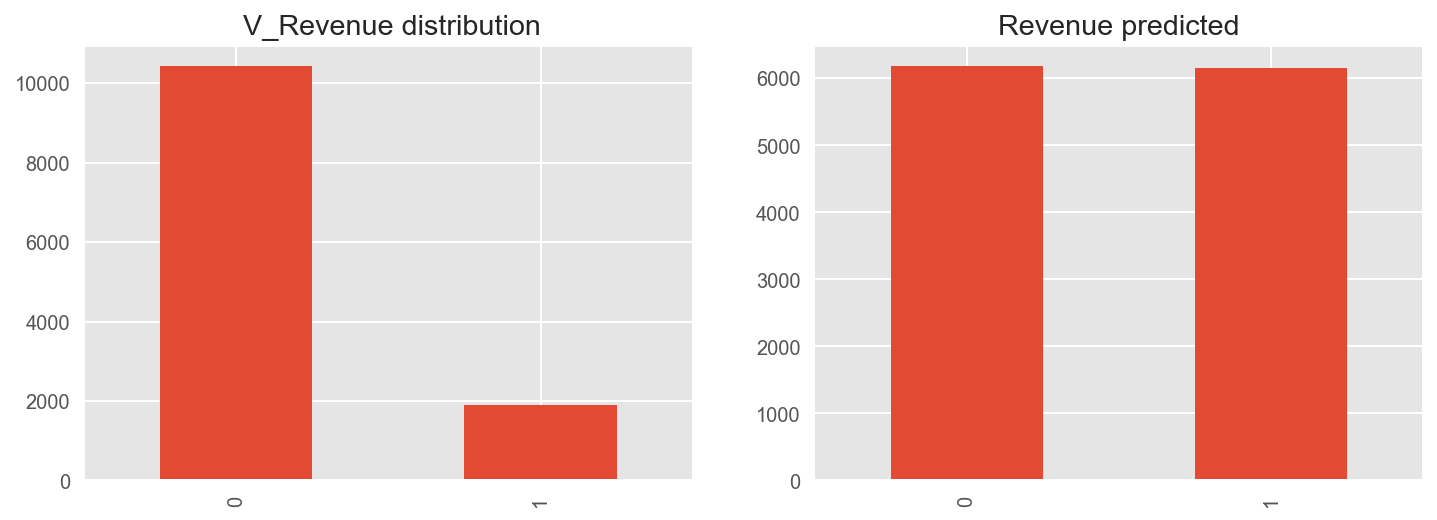

In [52]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
df_norm['V_Revenue'].value_counts().plot(kind='bar');
plt.title(' V_Revenue distribution')
plt.subplot(1,2,2)
df_norm['Revenue'].value_counts().plot(kind='bar');
plt.title('Revenue predicted')
plt.show();

In [53]:
print("Revenue\n")
print(df_norm.Revenue.value_counts())
print()
print("V_Revenue")
print()
print(df_norm.V_Revenue.value_counts())

Revenue

0    6175
1    6155
Name: Revenue, dtype: int64

V_Revenue

0    10422
1     1908
Name: V_Revenue, dtype: int64


There seems to be similar amounts of instances of both classes between the cluster labels and the verified labels. Below we take a look closer to see if the instances were correctly clustered, where we will use a confusion matrix in order to further understand how well our clustering algorithm is doing in comparison to the labels.

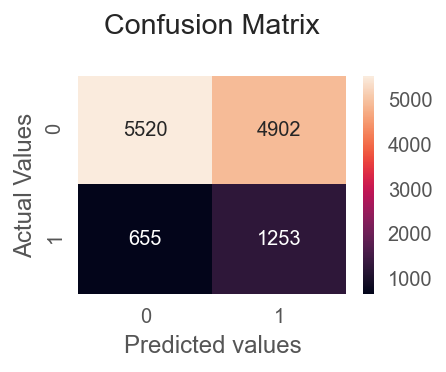

In [54]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix 
plt.figure(figsize=(3, 2))
conf = confusion_matrix(df_norm.V_Revenue, df_norm.Revenue)
sns.heatmap(conf, annot=True , fmt="d")
plt.title("Confusion Matrix\n")
plt.ylabel('Actual Values')
plt.xlabel('Predicted values')
plt.show();

From the confusion matrix there seems to be a large amount of 'miss-clustered' data points and there were more data points mistaken as a purchase than there are data points that were mistaken as `not` a purchase. 

- Out of the 12330 instance 5520 were classified correctly as true positives and 1253 were classified correctly as true negatives, but on the other hand there are 4902 that we misclassified as False positives which is extremely high relative to the total amount of instances, further more there are 655 data points that were miss-classified as false negatives.

In other words there is a huge amount of miss-clustered data points but there are far more false positives than there are false negatives.

# SVM Modeling

Before creating SVM models we will implement univariate feature selection, using SelectKBest that removes all but the K highest scoring features.

In [55]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier

# find best scored 5 features
select_feature = SelectKBest(chi2, k=4).fit(df_norm[explanatory],df_norm['Revenue'])

# Created a dictionary.
dic = {}
dic_scores = {}
dic_pvalue = {}
for score, name in zip(select_feature.scores_,df_norm[explanatory].columns):
    dic[name] = score
    dic_scores[name] = score
    
for score, name in zip(select_feature.pvalues_,df_norm[explanatory].columns):
    dic_pvalue[name] = score
    #dic_scores[name] = score
    
# Sorting the dictionary.
dic = {k: v for k, v in sorted(dic.items(), key=lambda item: item[1], reverse=True)}
dic

{'Month': 16270.226001122943,
 'SpecialDay': 754.946882591094,
 'TrafficType_4': 368.0670648962837,
 'TrafficType_2': 278.19475560993897,
 'TrafficType_3': 136.20581141036052,
 'VisitorType_New_Visitor': 106.50008412834137,
 'VisitorType_Other': 81.31675837870183,
 'Region_9': 52.52440340085322,
 'other_traffic_type': 46.919192162935005,
 'VisitorType_Returning_Visitor': 24.44777811061496,
 'Browser_4': 21.16388520759337,
 'Region_2': 17.292369358376874,
 'other_os': 13.13441693336329,
 'Region_6': 12.846889443763779,
 'OperatingSystems_1': 10.813764489045314,
 'OperatingSystems_2': 9.189561276323177,
 'PageValues': 8.863653708976152,
 'TrafficType_13': 8.847058281835302,
 'BounceRates': 8.564131416778224,
 'ExitRates': 8.405369347736048,
 'Browser_5': 6.77350514106453,
 'TrafficType_1': 5.9758984932965,
 'Weekend': 5.24531708386599,
 'Browser_1': 3.900387332512194,
 'Region_1': 2.612733420125208,
 'AVG_Info_Time': 1.8992088480602667,
 'AVG_Admin_Time': 1.6610787243298775,
 'Region_5':

It seems that Month has the highest `Chi2` score of all the scores present. One of the reasons is because this field was kept as categorical ordinal and not-normalized with the rest of the numeric features. We can also see that SpecialDay is at the top which makes sense based on our domain knowledge.

# SVM Modeling
Since we are going to perform a classification task, we will use the support vector classifier class, which is written as SVC in the Scikit-Learn's svm library starting with linear models and then evaluate if more complex models are needed.
We will have 3 set of features, based on Chi2 values and domain knowledge.

In [56]:
#non-normalize month feature selection
predictors1 = ['Month', 'SpecialDay']
predictors2 = ['SpecialDay', 'PageValues']
predictors3 = ['SpecialDay', 'PageValues','VisitorType_New_Visitor','TrafficType_4']

### SVM 1

For this SVM, we are going to be using the features Month and Special day as they have been proven to be predictive features through the Chi2.

In [57]:
X = df_norm[predictors1]
y = df_norm['Revenue']

In [58]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
#creating train and testing set
indices = np.arange(df_norm.shape[0])
X_train_1, X_test_1, y_train_1, y_test_1, idx1, idx2  = train_test_split(X, y,indices ,test_size = 0.2, random_state = 0)

# Cross validation.
accuracy_list = []
recall_list = []
auc_list = []
f1_list = []
precision_list = []

linear_svm_1 = SVC(kernel='linear')
linear_svm_1.fit(X_train_1, y_train_1)
accuracy_list.append(cross_val_score(linear_svm_1, X_train_1, y_train_1, scoring = "accuracy", cv = 5).mean())
recall_list.append(cross_val_score(linear_svm_1, X_train_1, y_train_1, scoring = "recall", cv = 5).mean())
auc_list.append(cross_val_score(linear_svm_1, X_train_1, y_train_1, scoring = "roc_auc", cv = 5).mean())
f1_list.append(cross_val_score(linear_svm_1, X_train_1, y_train_1, scoring = "f1", cv = 5).mean())
precision_list.append(cross_val_score(linear_svm_1, X_train_1, y_train_1, scoring = "precision", cv = 5).mean())

### SVM 2

For SVM 2 we will be using Special day and page values.

In [59]:
X = df_norm[predictors2]
y = df_norm['Revenue']

In [60]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
#creating train and testing set
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size = 0.2, random_state = 0)

linear_svm_2 = SVC(kernel='linear')
linear_svm_2.fit(X_train_2, y_train_2)
accuracy_list.append(cross_val_score(linear_svm_2, X_train_2, y_train_2, scoring = "accuracy", cv = 5).mean())
recall_list.append(cross_val_score(linear_svm_2, X_train_2, y_train_2, scoring = "recall", cv = 5).mean())
auc_list.append(cross_val_score(linear_svm_2, X_train_2, y_train_2, scoring = "roc_auc", cv = 5).mean())
f1_list.append(cross_val_score(linear_svm_2, X_train_2, y_train_2, scoring = "f1", cv = 5).mean())
precision_list.append(cross_val_score(linear_svm_2, X_train_2, y_train_2, scoring = "precision", cv = 5).mean())

### SVM 3
The features we will be using here are SpecialDay, PageValues,VisitorType_New_Visitor and TrafficType_4.

In [61]:
X = df_norm[predictors3]
y = df_norm['Revenue']

In [62]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
#creating train and testing set
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size = 0.2, random_state = 0)

linear_svm_3 = SVC(kernel='linear')
linear_svm_3.fit(X_train_3, y_train_3)
accuracy_list.append(cross_val_score(linear_svm_3, X_train_3, y_train_3, scoring = "accuracy", cv = 5).mean())
recall_list.append(cross_val_score(linear_svm_3, X_train_3, y_train_3, scoring = "recall", cv = 5).mean())
auc_list.append(cross_val_score(linear_svm_3, X_train_3, y_train_3, scoring = "roc_auc", cv = 5).mean())
f1_list.append(cross_val_score(linear_svm_3, X_train_3, y_train_3, scoring = "f1", cv = 5).mean())
precision_list.append(cross_val_score(linear_svm_3, X_train_3, y_train_3, scoring = "precision", cv = 5).mean())

# Select Models

In [63]:
print("\t \t The Model Metric Matrix")
# Cross validation.
metrics_summary = pd.DataFrame()
metrics_summary['Model #'] = ['model 1', 'model 2','model 3']
metrics_summary['Predictors'] = [2,2,4]
metrics_summary['Recall'] = recall_list
metrics_summary['Accuracy'] = accuracy_list
metrics_summary['Precision'] = precision_list
metrics_summary['AUC'] = auc_list
metrics_summary['F1_score'] = f1_list
metrics_summary

	 	 The Model Metric Matrix


,Model #,Predictors,Recall,Accuracy,Precision,AUC,F1_score
0,model 1,2,1.000000,1.000000,1.000000,1.000000,1.000000
1,model 2,2,1.000000,0.600974,0.555687,0.602459,0.714386
2,model 3,4,0.964849,0.634226,0.580334,0.647607,0.724726


In [64]:
#testing with model 1

In [65]:
print("Our final model:")
print('Accuracy of SVM classifier on test set: {:.2f}'.format(linear_svm_1.score(X_test_1[predictors1], y_test_1)))

Our final model:
Accuracy of SVM classifier on test set: 1.00


In [66]:
print("Our final model:")
print('Accuracy of SVM classifier on test set: {:.2f}'.format(linear_svm_2.score(X_test_2[predictors2], y_test_2)))

Our final model:
Accuracy of SVM classifier on test set: 0.60


In [67]:
print("Our final model:")
print('Accuracy of SVM classifier on test set: {:.2f}'.format(linear_svm_3.score(X_test_3[predictors3], y_test_3)))

Our final model:
Accuracy of SVM classifier on test set: 0.63


Considering we have a balanced dataset at 50/50 in terms of the response variable, moving forward we will be mainly looking at the accuracy scores.

Model 1: 
    When we built the first model we chose the attribute Month because it had a high Chi2 score and fits with our domain knowledge as a good predictor. However, after building the model we see that the prediction score is 100%. Obviously there was an issue with the model. After investigating we found that the clustering model we built at the beginning of this analysis was extremely biased when assigning classes to observations. (See below:)

Text(0, 0.5, 'Frequency of Revenue')

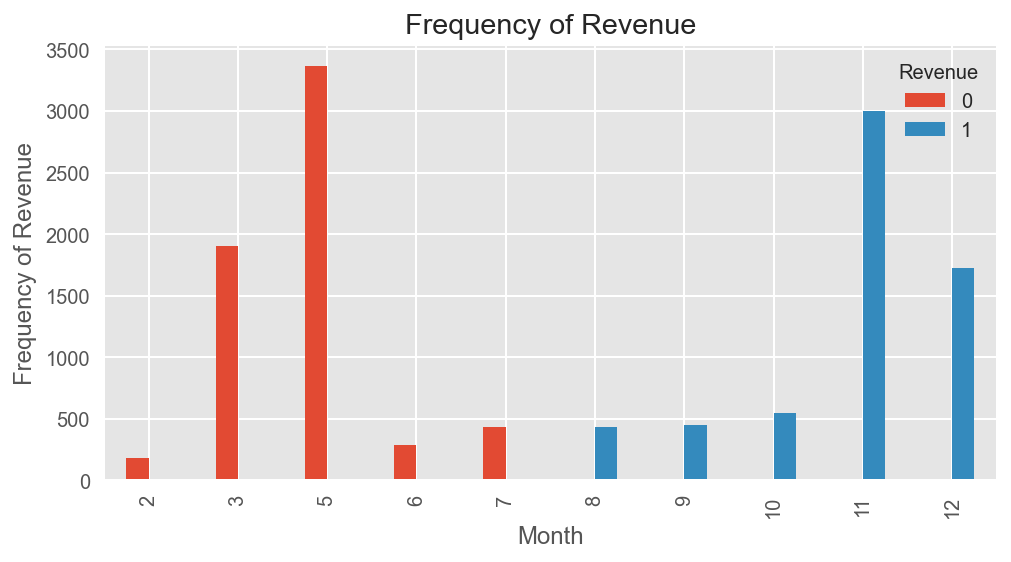

In [68]:
pd.crosstab(df_norm.Month,df_norm.Revenue).plot(kind='bar');
plt.title('Frequency of Revenue')
plt.xlabel('Month')
plt.ylabel('Frequency of Revenue')

Considering this extreme bias, we decided this model would not generalize well and we will prefer other models that do not include Month as a predictor.

Model 2 & 3

    Model 2 and 3 seem to exhibit accuracy scores that are close to each other at 0.60 and 0.63 relatively. The argument for choosing model 2 is that it has less predictors (2 predictors) than model 3 (4 predictors) and it seems to provide close results, however model 3 seems to provide better accuracy scores, having 3% more accuracy. Since both models have low amount of predictors, it stands to reason to choose the model with the higher accuracy score at 63%.

# Clustering + SVM Output vs. Actual Labels

In this section we will compare the content of the Revenue generated by the SVM algorithm and the content of the verified V_Revenue.

In [80]:
y_pred = linear_svm_3.predict(X_test_3[predictors3])
y_pred = pd.DataFrame(y_pred, columns = ['Revenue'])

v_revenue = df_norm.iloc[idx2,:]["V_Revenue"]
v_revenue = pd.DataFrame(v_revenue, columns = ['V_Revenue'])

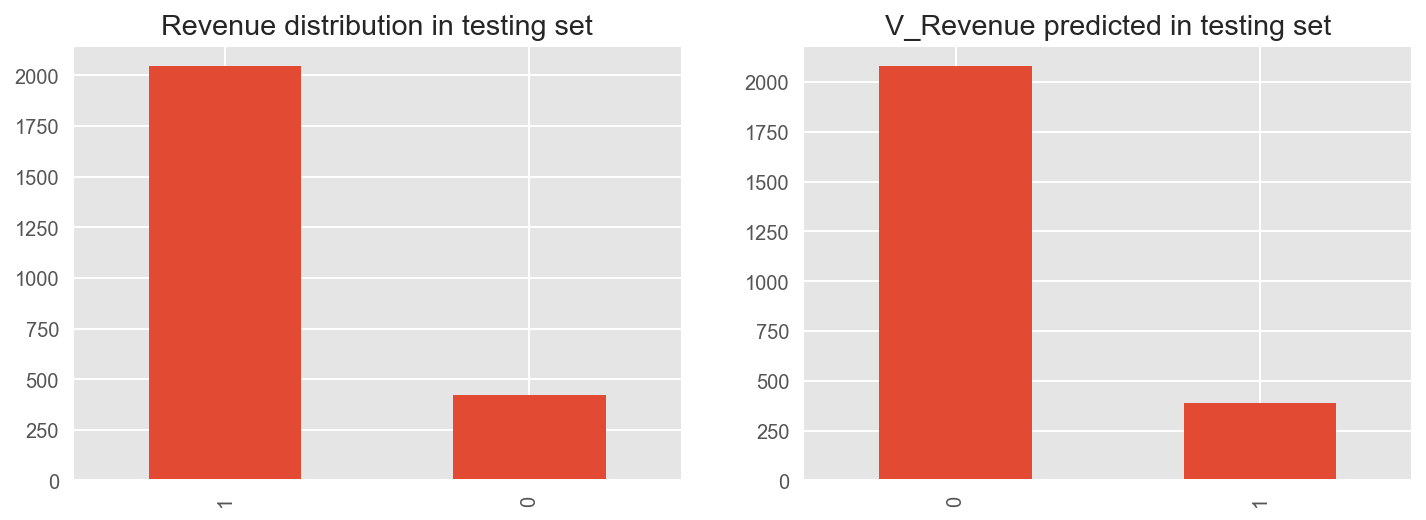

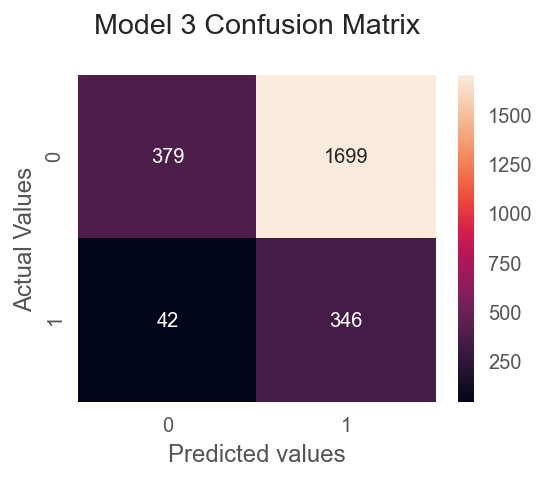

In [86]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
y_pred['Revenue'].value_counts().plot(kind='bar');
plt.title('Revenue distribution in testing set')
plt.subplot(1,2,2)
v_revenue['V_Revenue'].value_counts().plot(kind='bar');
plt.title('V_Revenue predicted in testing set')
plt.show();

##### Confusion Matrix for Model 3 ####
plt.figure(figsize=(4, 3))
cm_2 = confusion_matrix(v_revenue, y_pred)
sns.heatmap(cm_2,annot=True,fmt="d")
plt.title("Model 3 Confusion Matrix\n")
plt.ylabel('Actual Values')
plt.xlabel('Predicted values')
plt.show();

We look at the actual metrics below for a clear picture of the model results on actual labels.

In [87]:
import sklearn.metrics as metrics
metrics.accuracy_score(y_pred,v_revenue)

0.2939983779399838

In [88]:
metrics.precision_score(y_pred,v_revenue)

0.8917525773195877

In [89]:
metrics.recall_score(y_pred,v_revenue)

0.16919315403422983

In [90]:
metrics.f1_score(y_pred,v_revenue)

0.28442252363337445

The SVM is not performing well and it seems to favor the true positive, which in this case is identifying correctly the cases where a revenue was generated. On the other hand the rest of the metrics like recall look really low, concluding that SVM is in general not being able to achieve a good performance with the actual labels.

# Conclusions

- Clustering <br>
Before applying clustering on this project it was important to perform EDA on our dataset to understand the nature of our data. We then performed normalization because we needed to unify the scale since some attributes had extremely high values, only Month (which has relatively high values) was not normalized. <br>
For the purposes of understanding the number of groups to be generated we performed hierarchical clustering which generated a dendrogram, the elbow plot, and the silhouette score to have the best estimation of the number of clusters, which end up being 2. <br>
After applying the K-means algorithm we had 2 groups of data, where we identified, based on our domain knowledge and descriptive statistics which class was more likely to correspond to sessions that generated revenue. We accomplished this by looking closely at fields like page value, bounce rate and exit rate.


- Classification <br>
We performed feature selection using Chi2 where the features with higher scores corresponded to the features that are more likely to perform better in a model. This approach combined with our domain knowledge and EDA allowed us to construct 3 sets of predictors, one for every SVM model we created.<br>
After creating the three SVM models, we decided to use accuracy as the main metric for our analysis because our response value from the (K-means) clustering algorithm was balanced. The accuracy score for our first model was 100% on the testing set, which was very interesting considering that it was also the same case in our cross-validation. After further analysis we discovered that the attribute "Month" was impacting the clustering model which created the response value. To remedy this we created models 2 and 3 without "Month". <br>
Models 2 & 3 provided similar accuracy scores at .60 and .63 respectively. We prefer Model 3 despite it having more features for its superior performance.


# Refrences
[1] https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

[2] Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, Chapter 5. Support Vector Machines.

[3] https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

[4] Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, Chapter 2.

[5] https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/